# Study EGOYQN Linelist
The data was collected by Médecin Sans Frontières in Guéckédou, Guinea

The "Line list" is a document which collects primary data such as age,sex, patient id, onset date etc ... It aslo in our case includes the result of the Ebola Test "epistat" and the "outcome" of the patient.

## Summary

Our first goal is to predict whether the patient has ebola or not based on several features given in the data frame, with 2500 patients and 187 features. 

*Visualization of data*
- We group the different types of features into different categories, such as (symptoms)
- Apply dictionarry taken from the "dictionary" which gives us the meaning of the feature 
- plot the distribution of the three categories (yes, no or unknown)

*Feature processing*
- Remove patients with only NaN (rows)

We decide to try out three different dataframes (pre-processed differently in order to see which one was best)

### First Data Frame
- Delete all columns which have more than 50 % of unknowns
- Then, delete the rows that have at least one unknown
- We are left with a small, small, dataframe but witout any unknowns
- Remove patients with rows of only zeros (no symptoms) as they will not bring any extra information 

*More data visualization*
- With correlation matrix between features, we removed so many that no features were highly correlated
- Looking at correlations between features and target variable
- Imbalance of data set (more Ebola positives than negatives)
- Radial Vision: We wanted to see whether we could determine patterns, between Ebola status and closeness to symptoms 
- PCA in 3d --> Nothing

*Preparing for the models*
- Splitting the train and test data in stratified mode (same ratio, explained why in report)
- Normalizing the continious features (Age)



*Models*
- Decision Tree Classifier: Interpretable 
- Random Forest : 

*Hyper-parameter tuning*
We used a Grid Search with a CV = 5
The scoring used was ROC_AUC
Parameters to tune :

Decision tree: 
- "max_depth", "min_samples_split", "max_leaf_nodes"

Random forest: 
- "n_estimators", "max_depth", "min_samples_split"

*Results*
Decision tree : Accuracy = 0.72 // AUC = 0.6139
Random Forest : Accuracy = 0.72 // AUC = 0.59


### Second Data Frame
In order to loose less data, we decided to make a function that would for each (revlevant) feature make an incidcator column next to it, where it would be one next to an observation if it was either positive or negative or zero if it was unknown.
We thought/hoped the model would understand that if the indicator column is zero ("don't take into account")
--> No. // more info on report

*More data visualization*
- Same steps as first frame
- But of course now we have many correlated features as each indicator column will be highly correlated to the orginal column

*Preparing for the models*
- Splitting the train and test data in stratified mode (same ratio, explained why in report)
- Normalizing the continious features (Age)

*Model*
- Decision Tree Classifier: Interpretable 

*Hyper-parameter tuning*
We used a Grid Search with a CV = 5
The scoring used was ROC_AUC
Parameters to tune :

Decision tree: 
- "max_depth", "min_samples_split", "max_leaf_nodes"

*Results*
Decision tree : Accuracy = 0.704 // AUC = 0.57

### Third Data Frame
Please refer to the NoteBook ExportDataFrame to see all the pre-processing steps. 

*More data visualization*
- Same steps as first frame
- Also used Manifold since we are now with a high dimension dataset

*Preparing for the models*
- Splitting the train and test data in stratified mode (same ratio, explained why in report)
- Normalizing the continious features ('age','datmac_dayofyear', 'datgck_dayofyear', 'referral_time_int', 'contdat1_dayofyear','fundat_dayofyear')
*Feature selection*
- Removing features with zero variance, that is, features that are the same for all patients
- Removal of highly correlated features (> 0.8)

Improvements:
- Looking at Recursive backward elimination 
- Using SelectKBest 

*Model*
- Decision Tree Classifier
- Logistic Regression
- Random Forest
- SVC

*Hyper-parameter tuning*
We used a Grid Search with a CV = 5
The scoring used was ROC_AUC
We use a validation curve in order to better visualize our range for the hyper-parameters

Parameters to tune :
In order for the computer to be able to run, we first found the best K for all the models and then plugged them intp their respective model when tuning the hyper-parameters. We also used Repeated stratified K folds in the grid search in order to

Decision tree: 
- "max_depth", "min_samples_split", "max_leaf_nodes"
SVC:
- "C", "gamma", "kernel" // improved "model__C", "model__gamma", "mdel_kernel", "anova__k"
Logistic Regression:
- "penalty", "C" // improved "model__C", "model__penalty", "annova__K"
Random Forest Classifier:
- "n_estimators", "max_depth", "min_samples_split", "max_leaf_nodes" // improved (same plus "anova__k")

*Results*
Decision tree : Accuracy =  // AUC = 
SVC : Accuracy =  // AUC = 
Random Forest : Accuracy =  // AUC = 
Logistic : Accuracy =  // AUC = 


Improved (using K Best for feature selection): 

Decision tree : Accuracy =  // AUC = 
SVC : Accuracy =  // AUC = 
Random Forest : Accuracy =  // AUC = 
Logistic : Accuracy =  // AUC = 


In [240]:
%matplotlib inline
%load_ext autoreload

%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sys
import eli5
sys.path.append('STUDIES')
from proj2_HELPERS_ import *
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from yellowbrick.features import Manifold
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import FeatureImportances


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [241]:
# Tool to calculate carbon footprint
from cumulator import base

cumulator = base.Cumulator()
cumulator.on()

In [242]:
# Path to dataset (change)

df_linelist = pd.read_csv('../../Original dataset/EGOYQN_Gueckedou_linelist_cleaned_pos_and_neg_2019_November_ANSI.csv', encoding = 'ISO-8859-1')
df_linelist

,msfid,mcid,datmac,transit,admis,gkdid,datgck,age,sex,respref,...,pcr2ct,epistat,commun,currstat,exdat,outold,outcome,locdec,condat,source
0,G1,Absent,01/01/1900,Non,Non,Absent,01/01/1900,60.0,2,14,...,.,2,1,1,2/22/2014,3,2,GUECKEDOU,02/02/2014,.
1,G10,Absent,01/01/1900,Non,Non,Absent,01/01/1900,35.0,2,14,...,.,1,0,1,3/17/2014,1,2,Hosto GKD,2/25/2014,.
2,G100,Absent,01/01/1900,Non,Oui,GKD25,04/11/2014,40.0,1,14,...,.,1,0,2,4/20/2014,8,1,na,01/01/1900,.
3,G1000,MC260,9/17/2014,Non,Oui,GKD775,01/01/1900,40.0,1,25,...,.,1,0,1,9/19/2014,3,2,Non rempli,01/01/1900,.
4,G1001,Absent,9/17/2014,Non,Oui,GKD776,9/19/2014,8.0,2,25,...,.,1,0,1,9/21/2014,3,2,Non rempli,01/01/1900,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,G995,Absent,01/01/1900,Non,Non,Absent,01/01/1900,999.0,2,36,...,.,1,1,1,9/19/2014,3,2,Non rempli,01/01/1900,.
2496,G996,Absent,01/01/1900,Non,Oui,Absent,9/18/2014,43.0,1,25,...,.,1,0,1,9/21/2014,3,2,Non rempli,01/01/1900,.
2497,G997,Absent,01/01/1900,Non,Oui,Absent,9/19/2014,34.0,2,25,...,.,0,0,.,9/21/2014,.,.,Non rempli,01/01/1900,.
2498,G998,Absent,01/01/1900,Non,Oui,Absent,9/17/2014,6.0,1,25,...,.,1,0,1,9/26/2014,3,2,Non rempli,01/01/1900,.


# Predictions ebola

### Symptoms 

In [243]:
symptoms = ['symfev', 'symn', 'symv', 'symvom', 'symdiar', 'symfat',
       'symanor', 'symdouab', 'symdouth', 'symdoumu', 'symdouar',
       'symceph', 'symtoux', 'symresp', 'symaval', 'symmalg', 'symict',
       'symconj', 'symercut', 'symhoq', 'symorb', 'symcoma', 'symconf',
       'symasth', 'symhemor', 'hemgen', 'heminj', 'hemnez', 'hemsel',
       'hemvoms', 'hemvomn', 'hemtou', 'hemvag', 'hempet', 'hemuri',
       'hemaut', 'contsusp', 'funvis', 'hospvis', 'anicon', 'anitiq']
df_symp = df_linelist[symptoms]

In [244]:
# apply dictionnary to get -1, 0, 1 for df_symp
dict_symp_answer = {'Non' : 'No', 'Oui' : 'Yes', 'Non rempli' : 'Unknown', 
                    'Pas applicable (non inclus dans fiche)' : 'Unknown', 
                    'Unknown' : '-1', 'Nan' : '-1', 'nan' : '-1', '7' : '-1',
                    'na': '-1', '.': '-1', 
                    '8': '-1', '9': '-1', '1':'1', '0':'0', '2':'-1', '3':'-1'}
df_symp = df_symp.astype('str')
df_symp = df_symp.applymap(lambda x : dict_symp_answer[x])

### Sex 

In [245]:
df_sex = df_linelist['sex']
df_sex = df_sex.astype('str')
dict_sex = {'1': '1', '2':'0', '9': '-1'}
df_sex = df_sex.apply(lambda x : dict_sex[x])

### Age 

In [246]:
df_age  = df_linelist['age']
df_age = df_age.replace(999, -1)

### Ebola 

In [247]:
# apply dictionnary to get -1, 0, 1 for df_ebola  --> 0: not a case, 1: ebola, -1: unknown
df_ebola  = df_linelist['epistat']
dict_ebola_answer = {'0':'0', '1':'1', '2':'1', '3':'-1', '9':'-1', '.':'-1'}
df_ebola = df_ebola.astype('str')
df_ebola = df_ebola.apply(lambda x : dict_ebola_answer[x])

### Assemble

In [248]:
# concatenate symptoms, age, sex and ebola
df_ebo = pd.concat([df_age, df_sex, df_symp, df_ebola], axis = 1, join = 'outer').astype('int')

### Feature processing

First drop rows where no symtoms

In [249]:
# convert all -1 to NaN so that we can use the dropna() function
df_ebo.replace(-1, np.nan, inplace=True)
# then drop rows with only nans 
df_ebo.dropna(axis=0, how='all', subset=symptoms, inplace=True)
# convert all NaN to -1 
df_ebo.replace(np.nan, -1, inplace=True)

df_ebo.head()

,age,sex,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,...,hemvag,hempet,hemuri,hemaut,contsusp,funvis,hospvis,anicon,anitiq,epistat
0,60.0,0.0,1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,35.0,0.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,40.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,40.0,1.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,8.0,0.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


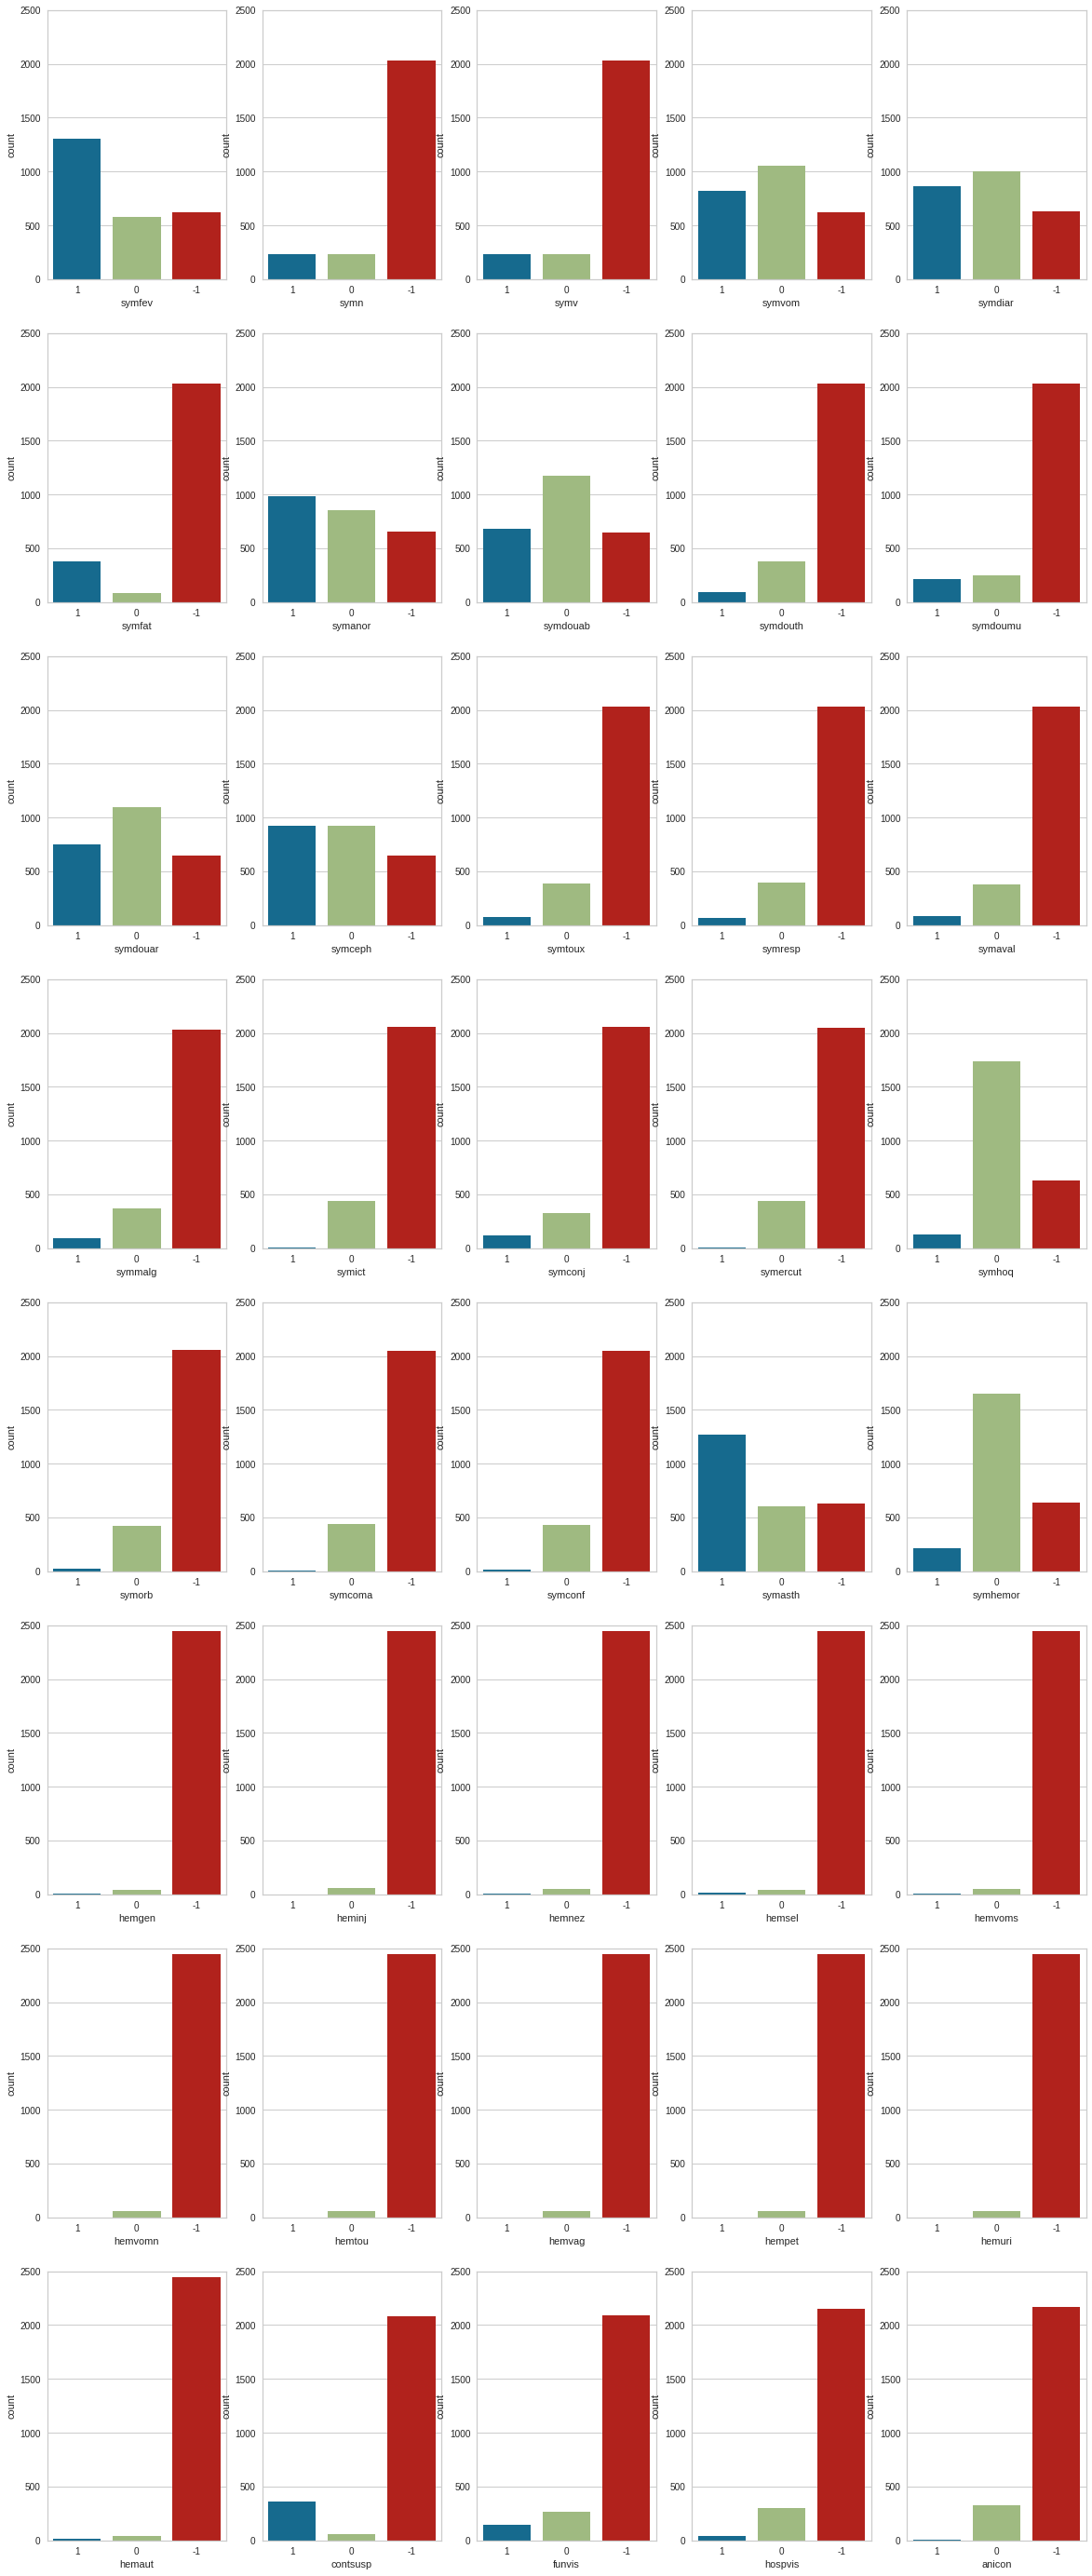

In [250]:
## Where 1 represents yes
## Where 0 represents No
## Where -1 represents Unknown
fig, axes = plt.subplots(nrows = 8, ncols=5, figsize=(20,50))
for ax, col in zip(axes.flatten(), df_symp.columns):
    sns.countplot(df_symp[col], ax = ax, order = ['1', '0', '-1'])
    ax.set_ylim(0, 2500)
fig.savefig("symptoms.png")    

## First proposition of data frame

In [251]:
df_ebo_simple = delete_minus1(df_ebo)
df_ebo_simple.head()

,age,sex,symfev,symvom,symdiar,symanor,symdouab,symdouar,symceph,symhoq,symasth,symhemor,epistat
1,35.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,40.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,40.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,12.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [252]:
remaining_symptoms = ['symfev', 'symvom', 'symdiar', 'symanor', 'symdouab', 'symdouar', 
                      'symceph', 'symhoq', 'symasth', 'symhemor']

# then do the same with zeros
df_ebo_simple.replace(0, np.nan, inplace=True)
df_ebo_simple.dropna(axis=0, how='all', subset=remaining_symptoms, inplace=True)
df_ebo_simple.replace(np.nan, 0, inplace=True)
df_ebo_simple.shape

(1768, 13)

In [253]:
y_ebo_simple = df_ebo_simple['epistat'].astype(float)
X_ebo_simple = df_ebo_simple.drop(['epistat'], axis = 1).astype(float)

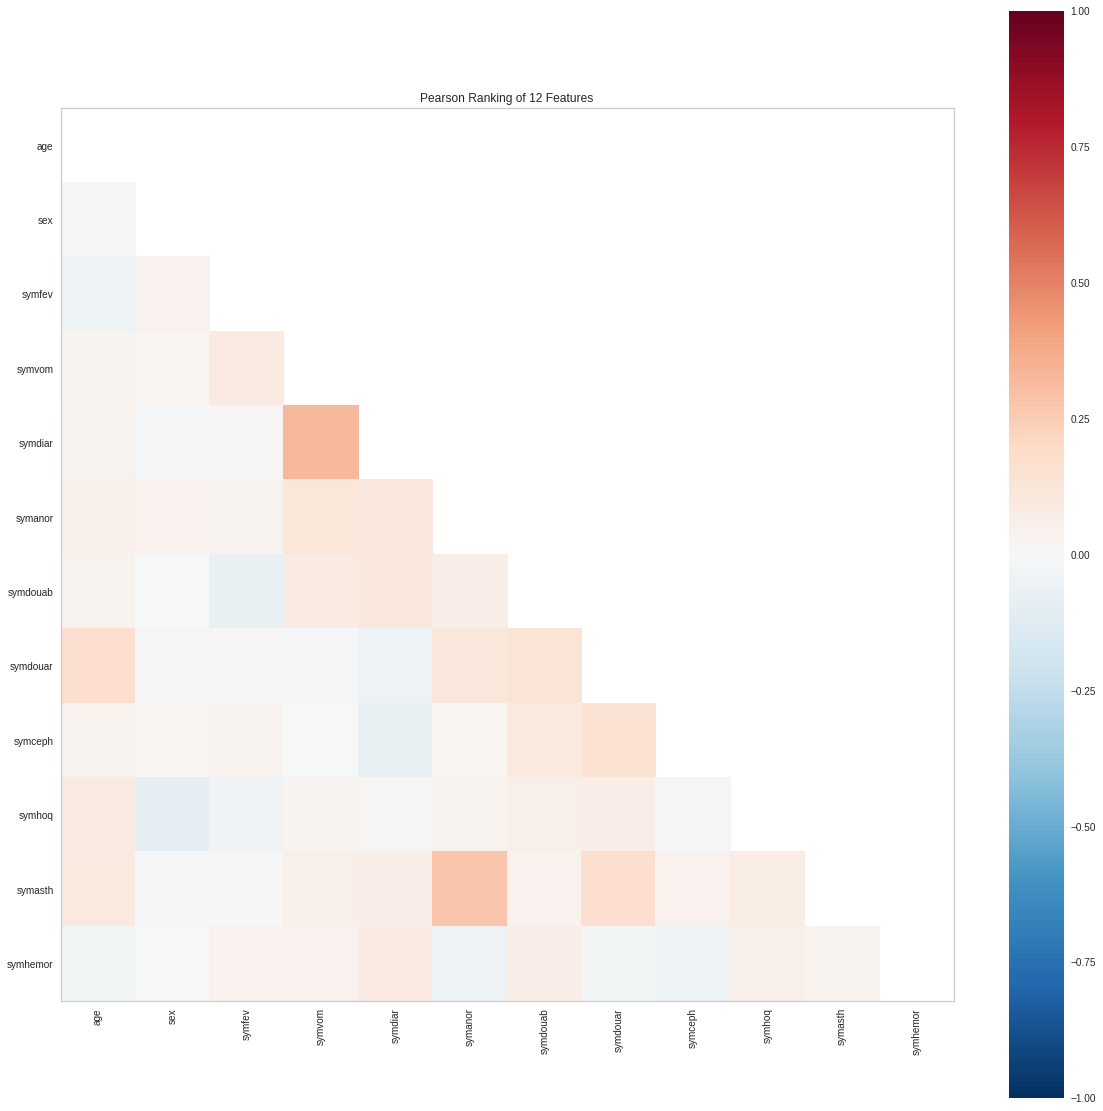

In [254]:
Corr_vision(X_ebo_simple)

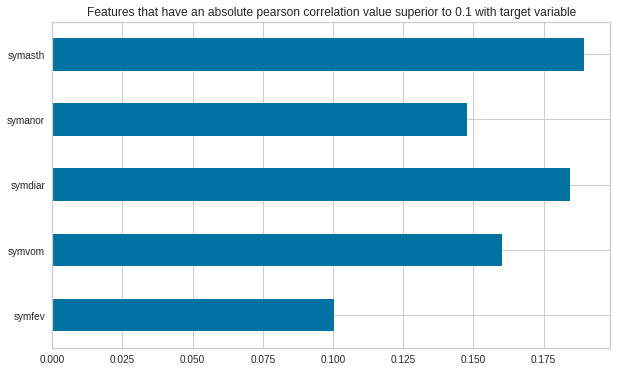

In [255]:
X_y = X_ebo_simple.join(y_ebo_simple)
corr_matrix = X_y.corr()

corr_y = corr_matrix['epistat']
threshold = 0.1  
fig, ax = plt.subplots(figsize=(10,6))
corr_y[corr_y.index[abs(corr_y) > threshold].tolist()].drop('epistat').plot(kind='barh')
plt.title('Features that have an absolute pearson correlation value superior to {} with target variable'.format(threshold))
plt.show()

These features havea correlation with the target variabe "Epistat", we expect them to be quite important

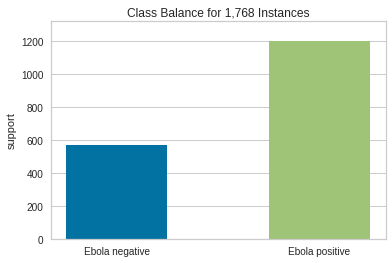

In [256]:
Imbalance(y_ebo_simple)

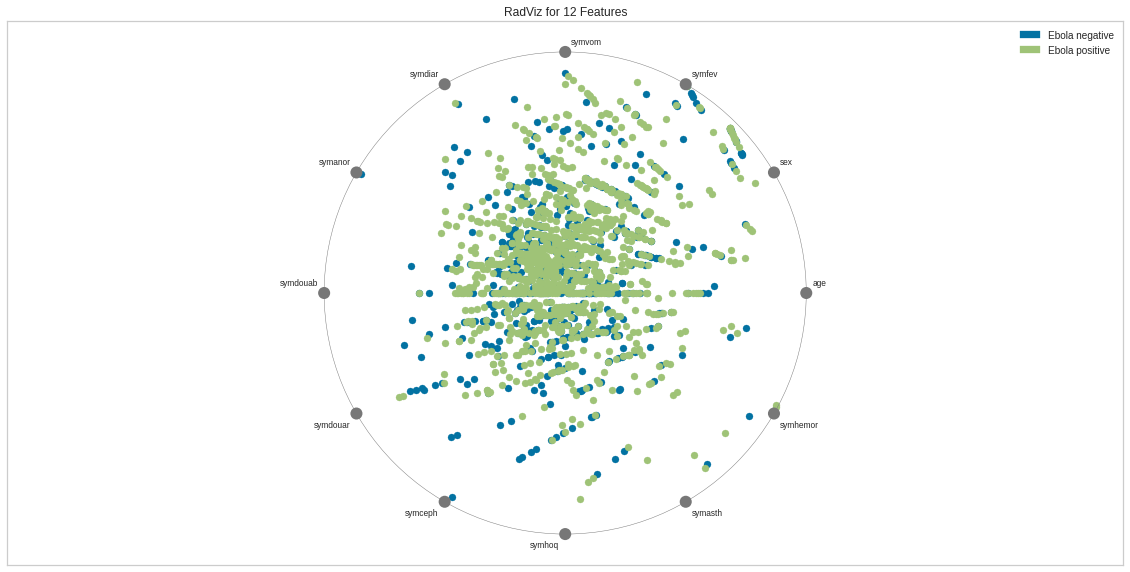

In [257]:
Rad_vision(X_ebo_simple, y_ebo_simple)

##### Nothing interesting, we hoped to see speration

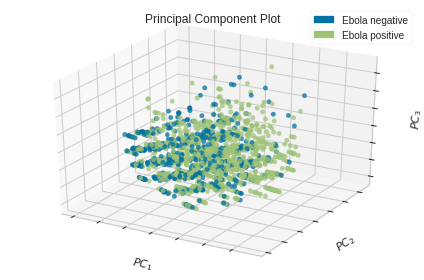

In [258]:
PCA_vision_3D(X_ebo_simple, y_ebo_simple.astype('int'))

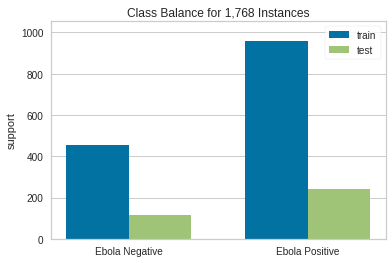

In [259]:
X_ebo_simple_train, X_ebo_simple_test, y_ebo_simple_train, y_ebo_simple_test = train_test_split(X_ebo_simple, y_ebo_simple, test_size=0.2, random_state=123, stratify=y_ebo_simple)


# Instantiate the visualizer
visualizer = ClassBalance(labels=['Ebola Negative', 'Ebola Positive'])

visualizer.fit(y_ebo_simple_train, y_ebo_simple_test)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure
plt.show()

In [260]:
# standardize age for df_ebo_simple

scaler1 = StandardScaler()
X_ebo_simple_train['age'] = scaler1.fit_transform(X_ebo_simple_train['age'].to_numpy().reshape(-1, 1))  
X_ebo_simple_test['age'] = scaler1.transform(X_ebo_simple_test['age'].to_numpy().reshape(-1, 1))

<ipython-input-260-8285799c9f9e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ebo_simple_train['age'] = scaler1.fit_transform(X_ebo_simple_train['age'].to_numpy().reshape(-1, 1))
<ipython-input-260-8285799c9f9e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ebo_simple_test['age'] = scaler1.transform(X_ebo_simple_test['age'].to_numpy().reshape(-1, 1))


## ML models here

#### Decision tree

In [261]:
simple_decision_tree = tree.DecisionTreeClassifier(random_state=123)
param_test = {
    'max_depth':[i for i in range(3, 15)],
    'min_samples_split':[i for i in range(2, 26)],
    'max_leaf_nodes':[i for i in range(6, 17)]
}

In [262]:
gsearch = GridSearchCV(
    estimator= simple_decision_tree,
    param_grid= param_test,
    scoring='roc_auc',
    n_jobs=-1,
    iid=False,
    cv=5
)
gsearch.fit(X_ebo_simple_train, y_ebo_simple_train)

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_leaf_nodes': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                            16],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25]},
             scoring='roc_auc')

In [263]:
clf_best_simple_tree = tree.DecisionTreeClassifier(
    random_state=123, 
    max_depth=         gsearch.best_params_['max_depth'], 
    min_samples_split= gsearch.best_params_['min_samples_split'],
    max_leaf_nodes=    gsearch.best_params_['max_leaf_nodes']
)
clf_best_simple_tree.fit(X_ebo_simple_train, y_ebo_simple_train)
y_ebo_simple_pred = clf_best_simple_tree.predict(X_ebo_simple_test)
accuracy_test = accuracy_score(y_ebo_simple_test, y_ebo_simple_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_ebo_simple_test, y_ebo_simple_pred)
auc_test = auc(fpr_test, tpr_test)
print("Accuracy on test set", accuracy_test)
print("Area under the curve accuracy on test set", auc_test)

Accuracy on test set 0.7231638418079096
Area under the curve accuracy on test set 0.6139254385964912


#### Random forest 

In [264]:
param_test = {
    'n_estimators':[20, 30, 40 , 50, 60, 100],
    'max_depth':[i for i in range(3, 15,2)],
    'min_samples_split':[i for i in range(2, 26,3)],
    'max_leaf_nodes':[i for i in range(6, 17,2)]
}
simple_random_forest = RandomForestClassifier(random_state = 123)

In [265]:
gsearch = GridSearchCV(
    estimator= simple_random_forest,
    param_grid= param_test,
    scoring='roc_auc',
    n_jobs=-1,
    iid=False,
    cv=5
)
gsearch.fit(X_ebo_simple_train, y_ebo_simple_train)
print(gsearch.best_params_)

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


{'max_depth': 7, 'max_leaf_nodes': 16, 'min_samples_split': 14, 'n_estimators': 100}


In [266]:
best_simple_random_forest = RandomForestClassifier(
    random_state= 123,
    n_estimators=     gsearch.best_params_['n_estimators'], 
    max_depth=        gsearch.best_params_['max_depth'], 
    min_samples_split=gsearch.best_params_['min_samples_split'],
    max_leaf_nodes=   gsearch.best_params_['max_leaf_nodes']
)
best_simple_random_forest = best_simple_random_forest.fit(X_ebo_simple_train, y_ebo_simple_train)
y_ebo_simple_pred = best_simple_random_forest.predict(X_ebo_simple_test)
accuracy_test = accuracy_score(y_ebo_simple_test, y_ebo_simple_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_ebo_simple_test, y_ebo_simple_pred)
auc_test = auc(fpr_test, tpr_test)
print("Accuracy on test set", accuracy_test)
print("Area under the curve accuracy on test set", auc_test)

Accuracy on test set 0.7259887005649718
Area under the curve accuracy on test set 0.5883771929824562


## Second proposition of data frame

In [267]:
df_ebo_extra = df_ebo
# delete all rows where y = -1 :
df_ebo_extra = df_ebo_extra[df_ebo_extra['epistat']!=-1]
df_ebo_extra = make_indicators(df_ebo_extra, df_ebo_extra.drop('epistat', axis=1).columns, [-1]*len(df_ebo_extra.drop('epistat', axis=1).columns), False)
df_ebo_extra.head()                                                                                                    

,age,sex,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,...,hemtou_indicator,hemvag_indicator,hempet_indicator,hemuri_indicator,hemaut_indicator,contsusp_indicator,funvis_indicator,hospvis_indicator,anicon_indicator,anitiq_indicator
0,60.0,0.0,1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35.0,0.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.0,1.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,0.0,1.0,-1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
y_ebo_extra = df_ebo_extra['epistat'].astype(float)
X_ebo_extra = df_ebo_extra.drop(['epistat'], axis = 1).astype(float)

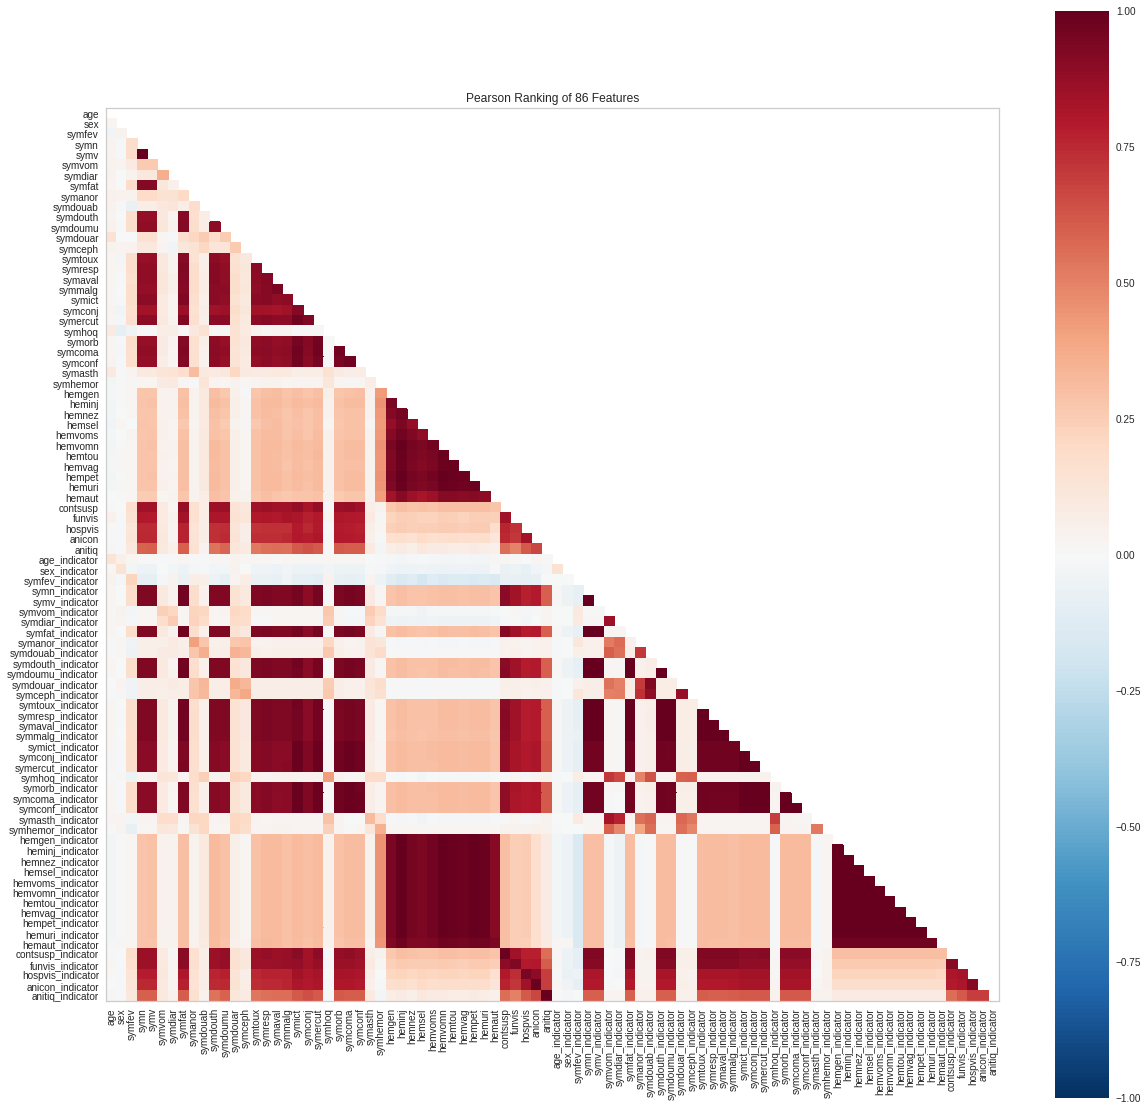

In [269]:
Corr_vision(X_ebo_extra)

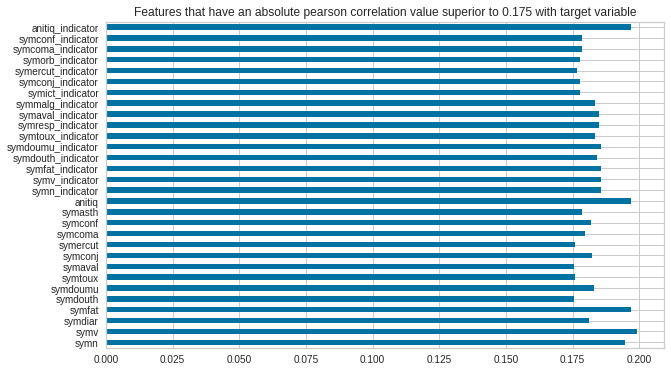

In [270]:
X_y = X_ebo_extra.join(y_ebo_extra)
corr_matrix = X_y.corr()

corr_y = corr_matrix['epistat']
threshold = 0.175
fig, ax = plt.subplots(figsize=(10,6))
corr_y[corr_y.index[abs(corr_y) > threshold].tolist()].drop('epistat').plot(kind='barh')
plt.title('Features that have an absolute pearson correlation value superior to {} with target variable'.format(threshold))
plt.show()

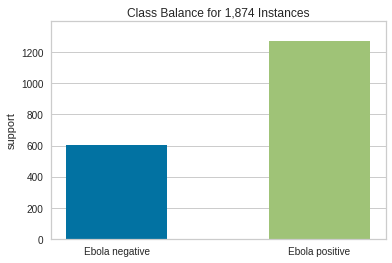

In [271]:
Imbalance(y_ebo_extra)

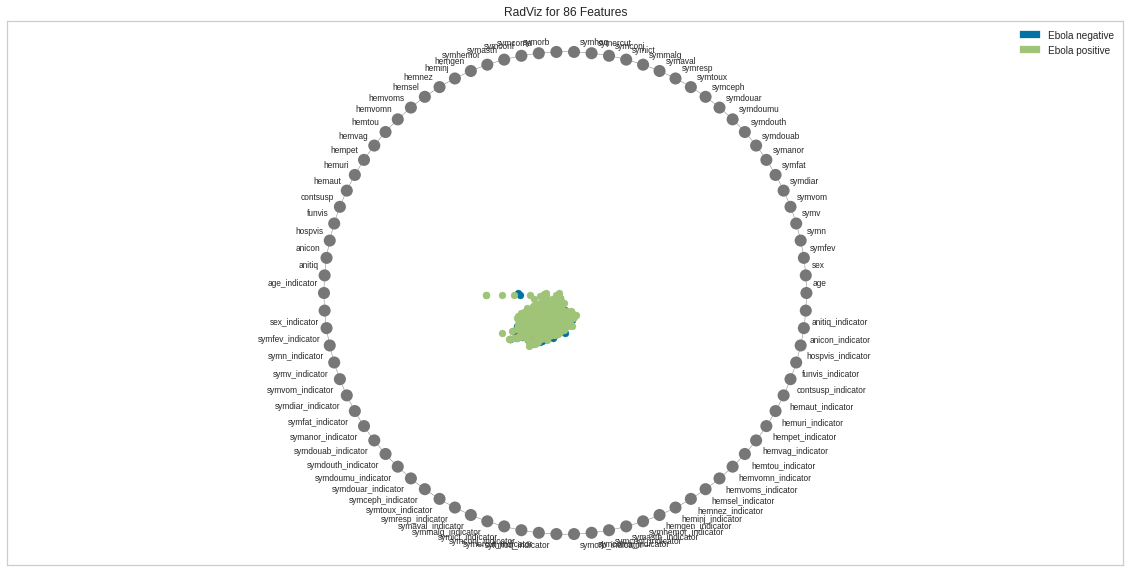

In [272]:
Rad_vision(X_ebo_extra, y_ebo_extra)

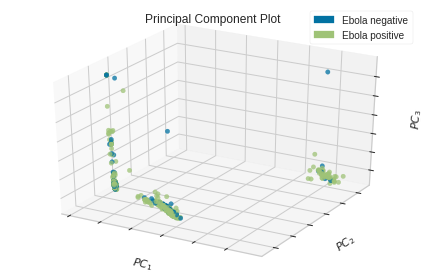

In [273]:
PCA_vision_3D(X_ebo_extra, y_ebo_extra.astype('int'))

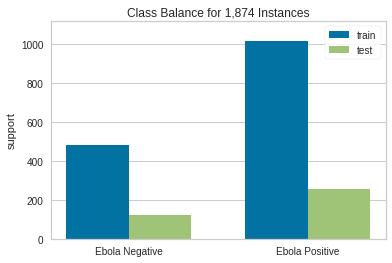

In [274]:
X_ebo_extra_train, X_ebo_extra_test, y_ebo_extra_train, y_ebo_extra_test = train_test_split(X_ebo_extra, y_ebo_extra, test_size=0.2, random_state=123, stratify=y_ebo_extra)

# Instantiate the visualizer
visualizer = ClassBalance(labels=['Ebola Negative', 'Ebola Positive'])

visualizer.fit(y_ebo_extra_train, y_ebo_extra_test)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure
plt.show()

In [275]:
## standardize age

# change -1 to Nan so that it is not take into account when doing standardization 
X_ebo_extra_train['age'].replace(-1, np.nan, inplace=True)
X_ebo_extra_test['age'].replace(-1, np.nan, inplace=True)

# standardization
scaler2 = StandardScaler()
X_ebo_extra_train['age'] = scaler2.fit_transform(X_ebo_extra_train['age'].to_numpy().reshape(-1, 1))  
X_ebo_extra_test['age'] = scaler2.transform(X_ebo_extra_test['age'].to_numpy().reshape(-1, 1))

# we can rechange nans to -1 
X_ebo_extra_train['age'].replace(np.nan, -1, inplace=True)
X_ebo_extra_test['age'].replace(np.nan, -1, inplace=True)

/home/lavinia/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-275-404357777669>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ebo_extra_train['age'] = scaler2.fit_transform(X_ebo_extra_train['age'].to_numpy().reshape(-1, 1))
<ipython-input-275-404357777669>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [276]:
# sanity check 
print(sum(X_ebo_extra_train['age_indicator']==0))
print(sum(X_ebo_extra_train['age']==-1))

8
8


## ML models here

In [277]:
extra_decision_tree = tree.DecisionTreeClassifier(random_state=123)
param_test = {
    'max_depth':[i for i in range(3, 15, 2)],
    'min_samples_split':[i for i in range(2, 26, 2)],
    'max_leaf_nodes':[i for i in range(6, 17, 2)]
}

In [278]:
gsearch = GridSearchCV(
    estimator= extra_decision_tree,
    param_grid= param_test,
    scoring='roc_auc',
    n_jobs=-1,
    iid=False,
    cv=5
)
gsearch.fit(X_ebo_extra_train, y_ebo_extra_train)

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_leaf_nodes': [6, 8, 10, 12, 14, 16],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20, 22, 24]},
             scoring='roc_auc')

In [279]:
clf_best_extra_tree = tree.DecisionTreeClassifier(
    random_state=123, 
    max_depth=         gsearch.best_params_['max_depth'], 
    min_samples_split= gsearch.best_params_['min_samples_split'],
    max_leaf_nodes=    gsearch.best_params_['max_leaf_nodes']
)
clf_best_extra_tree.fit(X_ebo_extra_train, y_ebo_extra_train)
y_ebo_extra_pred = clf_best_extra_tree.predict(X_ebo_extra_test)
accuracy_test = accuracy_score(y_ebo_extra_test, y_ebo_extra_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_ebo_extra_test, y_ebo_extra_pred)
auc_test = auc(fpr_test, tpr_test)
print("Accuracy on test set", accuracy_test)
print("Area under the curve accuracy on test set", auc_test)

Accuracy on test set 0.704
Area under the curve accuracy on test set 0.5661764705882353


## Third proposition of data frame

In [280]:
df_ml = pd.read_csv("Help_frame.csv")

df_ml.head()

,msfid,age,datmac_dayofyear,datgck_dayofyear,sex_F,sex_M,sex_U,symfev,symvom,symdiar,...,conttyp_Dead,conttyp_Unknown,funvis_No,funvis_Unknown,funvis_Yes,fundat_dayofyear,funcont_No,funcont_Unknown,funcont_Yes,epistat
0,G10,35.0,-1,-1,0,1,0,1,1,1,...,0,1,0,1,0,-1,0,1,0,1
1,G100,40.0,-1,101,1,0,0,1,0,0,...,0,1,0,1,0,-1,0,1,0,1
2,G1000,40.0,260,-1,1,0,0,1,0,1,...,0,1,0,1,0,-1,0,1,0,1
3,G1001,8.0,260,262,0,1,0,1,0,1,...,0,1,0,1,0,-1,0,1,0,1
4,G1002,12.0,258,262,0,1,0,1,1,1,...,1,0,1,0,0,-1,0,1,0,1


In [281]:
X_ebo_ml = df_ml.drop(columns = ['msfid','epistat'])
y_ebo_ml = df_ml['epistat']

#### Correlation matrix 

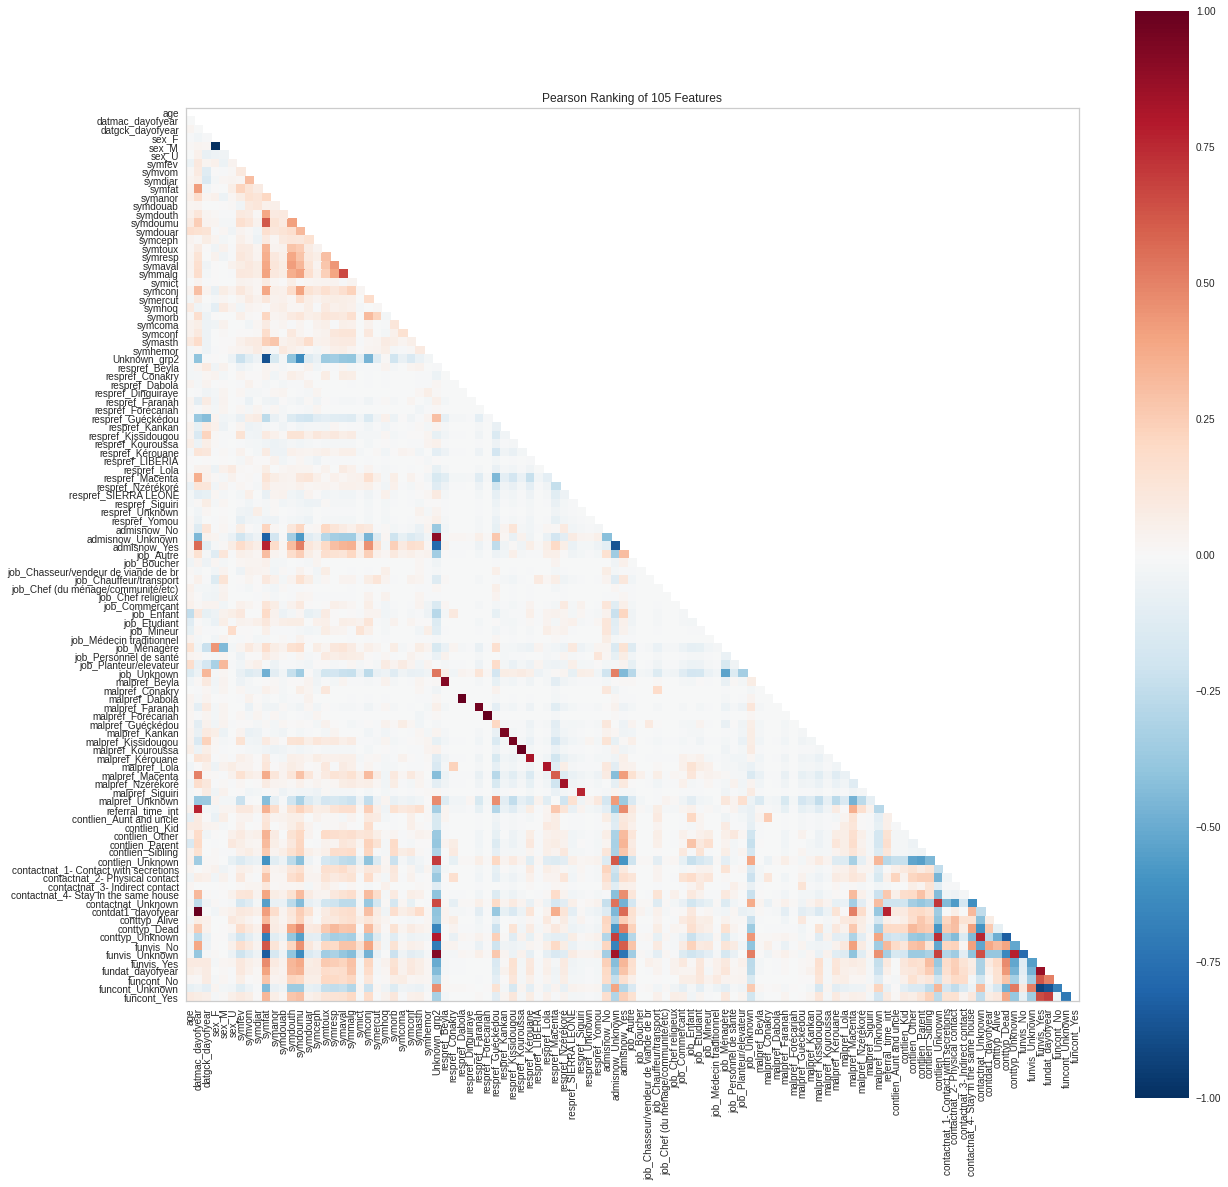

In [282]:
Corr_vision(X_ebo_ml)

Let's have a look at high correlation between features and target value.

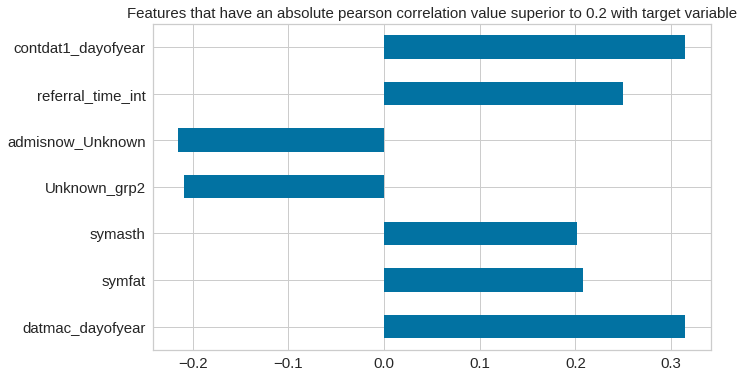

In [283]:
X_y = X_ebo_ml.join(y_ebo_ml)
corr_matrix = X_y.corr()

corr_y = corr_matrix['epistat']
threshold = 0.2
fig, ax = plt.subplots(figsize=(10,6))
corr_y[corr_y.index[abs(corr_y) > threshold].tolist()].drop('epistat').plot(kind='barh', fontsize= 15)
plt.title('Features that have an absolute pearson correlation value superior to {} with target variable'.format(threshold), fontsize= 15)
plt.show()

The values above are "correlated" with the output variable 'epistat' (ebola outcome), we expect them to be considered important during the model.

### Class imbalance

Balance is important in order to get a reliable accuracy for unseen datas, if imbalanced, steps need to be taken in order to take this into account. 
A good metric to look at is precision, recall and F1, this is discussed in the report. 

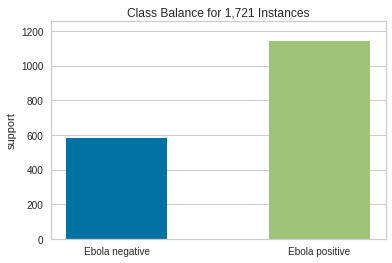

In [284]:
Imbalance(y_ebo_ml)

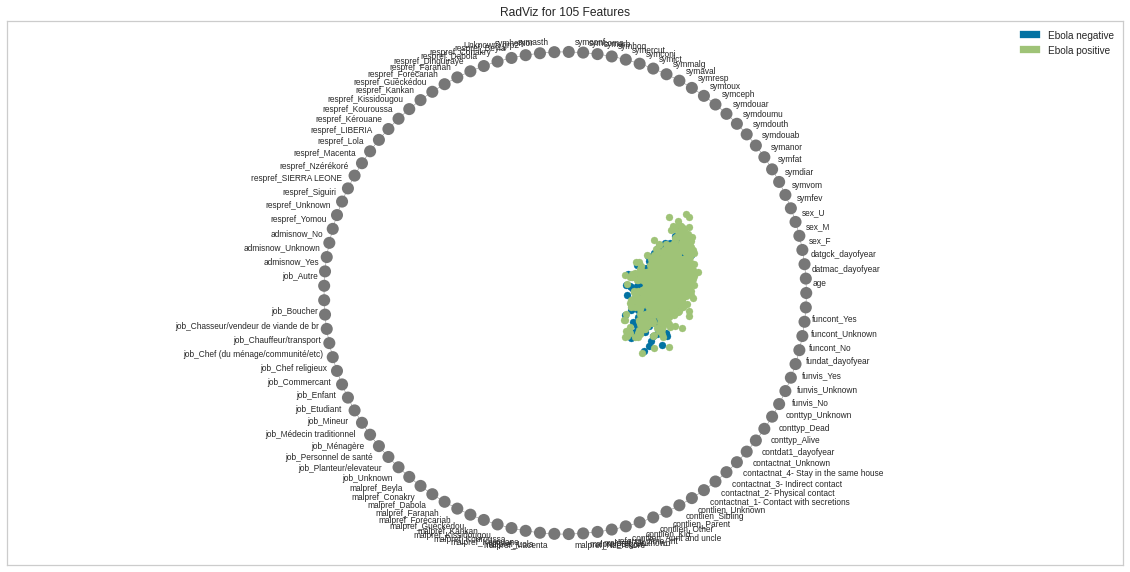

In [285]:
Rad_vision(X_ebo_ml, y_ebo_ml)

The plot above does not tell us much, we would have wished for a distinction of colors between ebola positive and negative patients

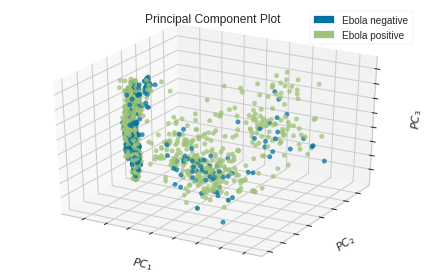

In [286]:
PCA_vision_3D(X_ebo_ml, y_ebo_ml)

PCA is not giving so much information: no clusters of ebola positive. 

#### We are in a high dimension dataset, let's try Manifold

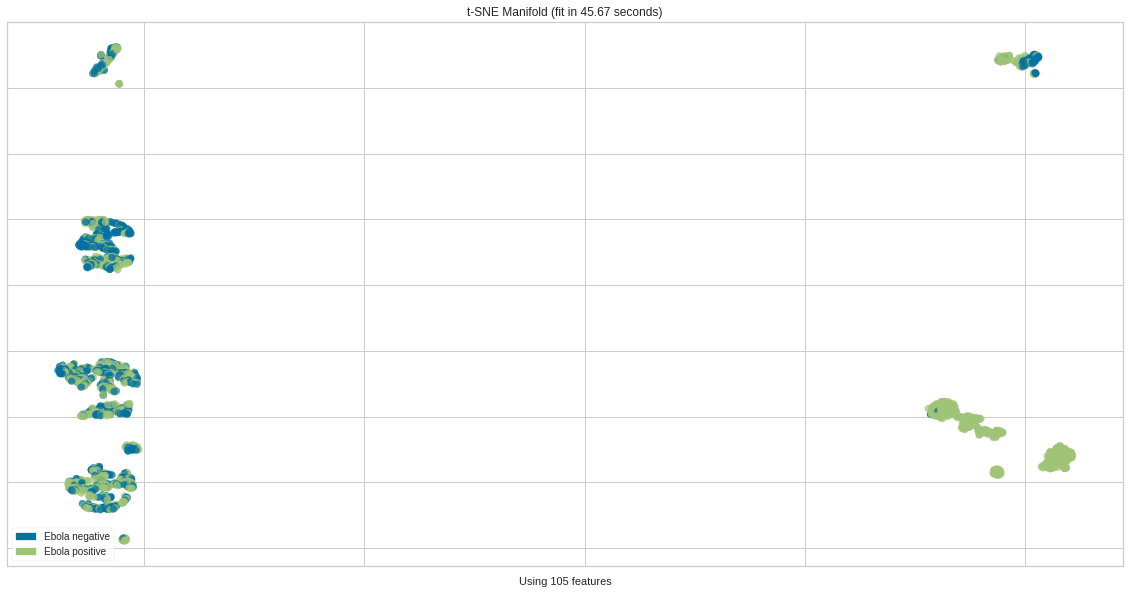

In [287]:
fig, ax = plt.subplots(figsize=(20,10))
# Instantiate the visualizer
viz = Manifold(manifold="tsne",  classes=['Ebola negative', 'Ebola positive'])
viz.fit_transform(X_ebo_ml, y_ebo_ml)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure
plt.show()

##### Split train/test

Before standardizing, we need to make sure that the dataset is split between train and test !
We need to be careful to standardize the test set with the parameters found during the standardizatio of the training set.

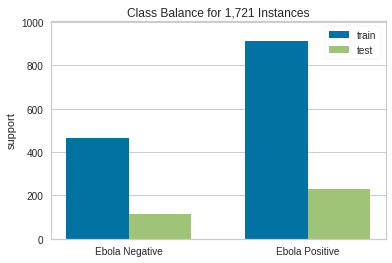

In [288]:

X_ebo_train, X_ebo_test, y_ebo_train, y_ebo_test = train_test_split(X_ebo_ml, y_ebo_ml, test_size=0.2, random_state=123, stratify=y_ebo_ml)


# Instantiate the visualizer
visualizer = ClassBalance(labels=['Ebola Negative', 'Ebola Positive'])

visualizer.fit(y_ebo_train, y_ebo_test)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure
plt.show()

##### Normalizing the data


In [289]:
scaler3 = StandardScaler()
numerical_col = ['age','datmac_dayofyear', 'datgck_dayofyear', 'referral_time_int', 'contdat1_dayofyear','fundat_dayofyear']
X_ebo_train.loc[:,numerical_col] = scaler3.fit_transform(X_ebo_train[numerical_col])
X_ebo_test.loc[:,numerical_col] = scaler3.transform(X_ebo_test[numerical_col])

/home/lavinia/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lavinia/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Feature selection 

#### First remove features with low variance

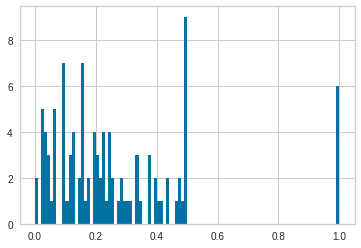

In [290]:
X_ebo_train.std().hist(bins= 100)

In [291]:
ebo_col_null_std = X_ebo_train.columns[(X_ebo_train.apply(lambda x : np.std(x)) == 0).values].values
ebo_col_null_std

array(['job_Boucher', 'malpref_Conakry'], dtype=object)

In [292]:
X_ebo_train.drop(columns = ebo_col_null_std, inplace = True)
X_ebo_test.drop(columns = ebo_col_null_std, inplace = True)

/home/lavinia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Then remove correlated features

In [293]:
corr_count = (abs(X_ebo_train.corr()) > 0.8).sum() 

In [294]:
# function found on https://www.geeksforgeeks.org/find-location-of-an-element-in-pandas-dataframe-in-python/ 
# and slightly modified for our case 
def getIndexes(dfObj, value): 
      
    listOfPos = [] 
    result = dfObj.isin([value]) 
    seriesObj = result.any() 
    columnNames = list(seriesObj[seriesObj == True].index) 
     
    for col in columnNames: 
        rows = list(result[col][result[col] == True].index) 
  
        for row in rows: 
            if col != row:
                listOfPos.append((row, col)) 
              
    return listOfPos 

In [295]:
corr_temp = abs(X_ebo_train[corr_count[corr_count > 1].index.to_list()].corr()) > 0.8

listOfPositions = getIndexes(corr_temp, True) 
  
print('Index positions of True in Dataframe : ') 
for i in range(len(listOfPositions)): 
    print( listOfPositions[i]) 

Index positions of True in Dataframe : 
('contdat1_dayofyear', 'datmac_dayofyear')
('sex_M', 'sex_F')
('sex_F', 'sex_M')
('Unknown_grp2', 'symfat')
('admisnow_Unknown', 'symfat')
('funvis_Unknown', 'symfat')
('symfat', 'Unknown_grp2')
('admisnow_Unknown', 'Unknown_grp2')
('conttyp_Unknown', 'Unknown_grp2')
('funvis_Unknown', 'Unknown_grp2')
('malpref_Beyla', 'respref_Beyla')
('malpref_Dabola', 'respref_Dabola')
('malpref_Faranah', 'respref_Faranah')
('malpref_Forécariah', 'respref_Forécariah')
('malpref_Kankan', 'respref_Kankan')
('malpref_Kissidougou', 'respref_Kissidougou')
('malpref_Kouroussa', 'respref_Kouroussa')
('malpref_Kérouane', 'respref_Kérouane')
('malpref_Lola', 'respref_Lola')
('malpref_Nzérékoré', 'respref_Nzérékoré')
('symfat', 'admisnow_Unknown')
('Unknown_grp2', 'admisnow_Unknown')
('admisnow_Yes', 'admisnow_Unknown')
('funvis_Unknown', 'admisnow_Unknown')
('admisnow_Unknown', 'admisnow_Yes')
('respref_Beyla', 'malpref_Beyla')
('respref_Dabola', 'malpref_Dabola')
('re

With this above list of correlated features we can choose which features we want to remove by hand.

In [296]:
col_correlated_removed = ['contdat1_dayofyear', 'sex_F', 'Unknown_grp2', 'respref_Beyla', 'respref_Dabola', 'respref_Faranah',
                         'respref_Forécariah', 'respref_Kankan',  'respref_Kissidougou', 'respref_Kouroussa', 'respref_Kérouane',
                          'respref_Lola', 'respref_Nzérékoré']

X_ebo_train.drop(columns = col_correlated_removed, inplace = True)
X_ebo_test.drop(columns = col_correlated_removed, inplace = True)

# Let us export the training and the test "cleaned" dataframes in order to ease the computation at the end

Pred_train_data = X_ebo_train.join(pd.DataFrame(y_ebo_train), how ='outer' )
Pred_train_data.to_csv(r'/home/lavinia/Documents/Doc_2020/EPFL/Master/Semester I/Machine Learning/Project_2/Private_folder/NoteBooks_ML/STUDIES/Linelist_train.csv',index=False)


Pred_test_data = X_ebo_test.join(pd.DataFrame(y_ebo_test), how ='outer' )
Pred_test_data.to_csv(r'/home/lavinia/Documents/Doc_2020/EPFL/Master/Semester I/Machine Learning/Project_2/Private_folder/NoteBooks_ML/STUDIES/Linelist_test.csv',index=False)

# Reference test
Let's see the accuracy and auc for a model that predicts Ebola for all


In [297]:
y_ebo_ref = np.ones(len(y_ebo_test))
accuracy_test = accuracy_score(y_ebo_test, y_ebo_ref)
fpr_test, tpr_test, thresholds_test = roc_curve(y_ebo_test, y_ebo_ref)
auc_test = auc(fpr_test, tpr_test)
print("Area Under the curve accuracy on test set: ", auc_test)
print("Accuracy for test set: ",accuracy_test)
print("F1-score for test set: ", f1_score(y_ebo_test, y_ebo_ref))

Area Under the curve accuracy on test set:  0.5
Accuracy for test set:  0.663768115942029
F1-score for test set:  0.7979094076655052


*The accuracy of 0.66 is due to the fact that 66% of people are in fact ebola positive*

# First Set of Models // "Improved" version is further down

#### Logistic regression 

 Use of validation curve to determine a plausible area for the hyper-parameters:
- penalty: norm used for the penalization
- C: inverse of regularization strength

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


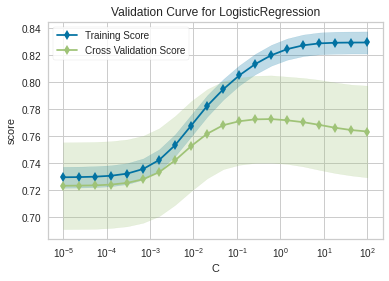

In [298]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=123)
param_range = np.logspace(-5, 2, 20)

viz = ValidationCurve(LogisticRegression(), param_name="C", param_range=param_range,logx=True, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

With a StratifiedKFold the variance was much too high so we chose to repeat this StratifiedKFold 5 times using the RepeatedStratifiedKFold command. This decreased the variance significantly.

Following the previous remark on variance, we will use RepeatedStratifiedKFold for the next models as soon as the calculation time allows it.   

In [299]:
parameters = {'penalty': ['l1', 'l2'], 'C' : np.logspace(-1, 0, 20)}
logit = LogisticRegression()

clf = GridSearchCV(logit, parameters, scoring = 'roc_auc', n_jobs=-1, cv = cv)
clf.fit(X_ebo_train, y_ebo_train)
clf.best_params_

{'C': 0.37926901907322497, 'penalty': 'l2'}

In [300]:
logit = LogisticRegression(penalty = clf.best_params_['penalty'], C = clf.best_params_['C'])
logit.fit(X_ebo_train, y_ebo_train)
y_ebo_pred = logit.predict(X_ebo_test)
accuracy_test = accuracy_score(y_ebo_test, y_ebo_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_ebo_test, y_ebo_pred)
auc_test = auc(fpr_test, tpr_test)
print("Area under the curve for test set : ", auc_test)
print("Accuracy of test set: ", accuracy_test)


Area under the curve for test set :  0.6582404758319529
Accuracy of test set:  0.7072463768115942


In [301]:
eli5.show_weights(logit, feature_names=list(X_ebo_train.columns))

Weight?,Feature
+0.963,datmac_dayofyear
+0.885,symdiar
+0.740,admisnow_No
+0.699,datgck_dayofyear
+0.696,conttyp_Dead
+0.580,symasth
+0.574,symhemor
+0.555,malpref_Kouroussa
+0.540,malpref_Faranah
+0.499,symconf


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/lavinia/anaconda3/lib/python3.8/site-packages/yellowbrick/model_selection/importances.py:189: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


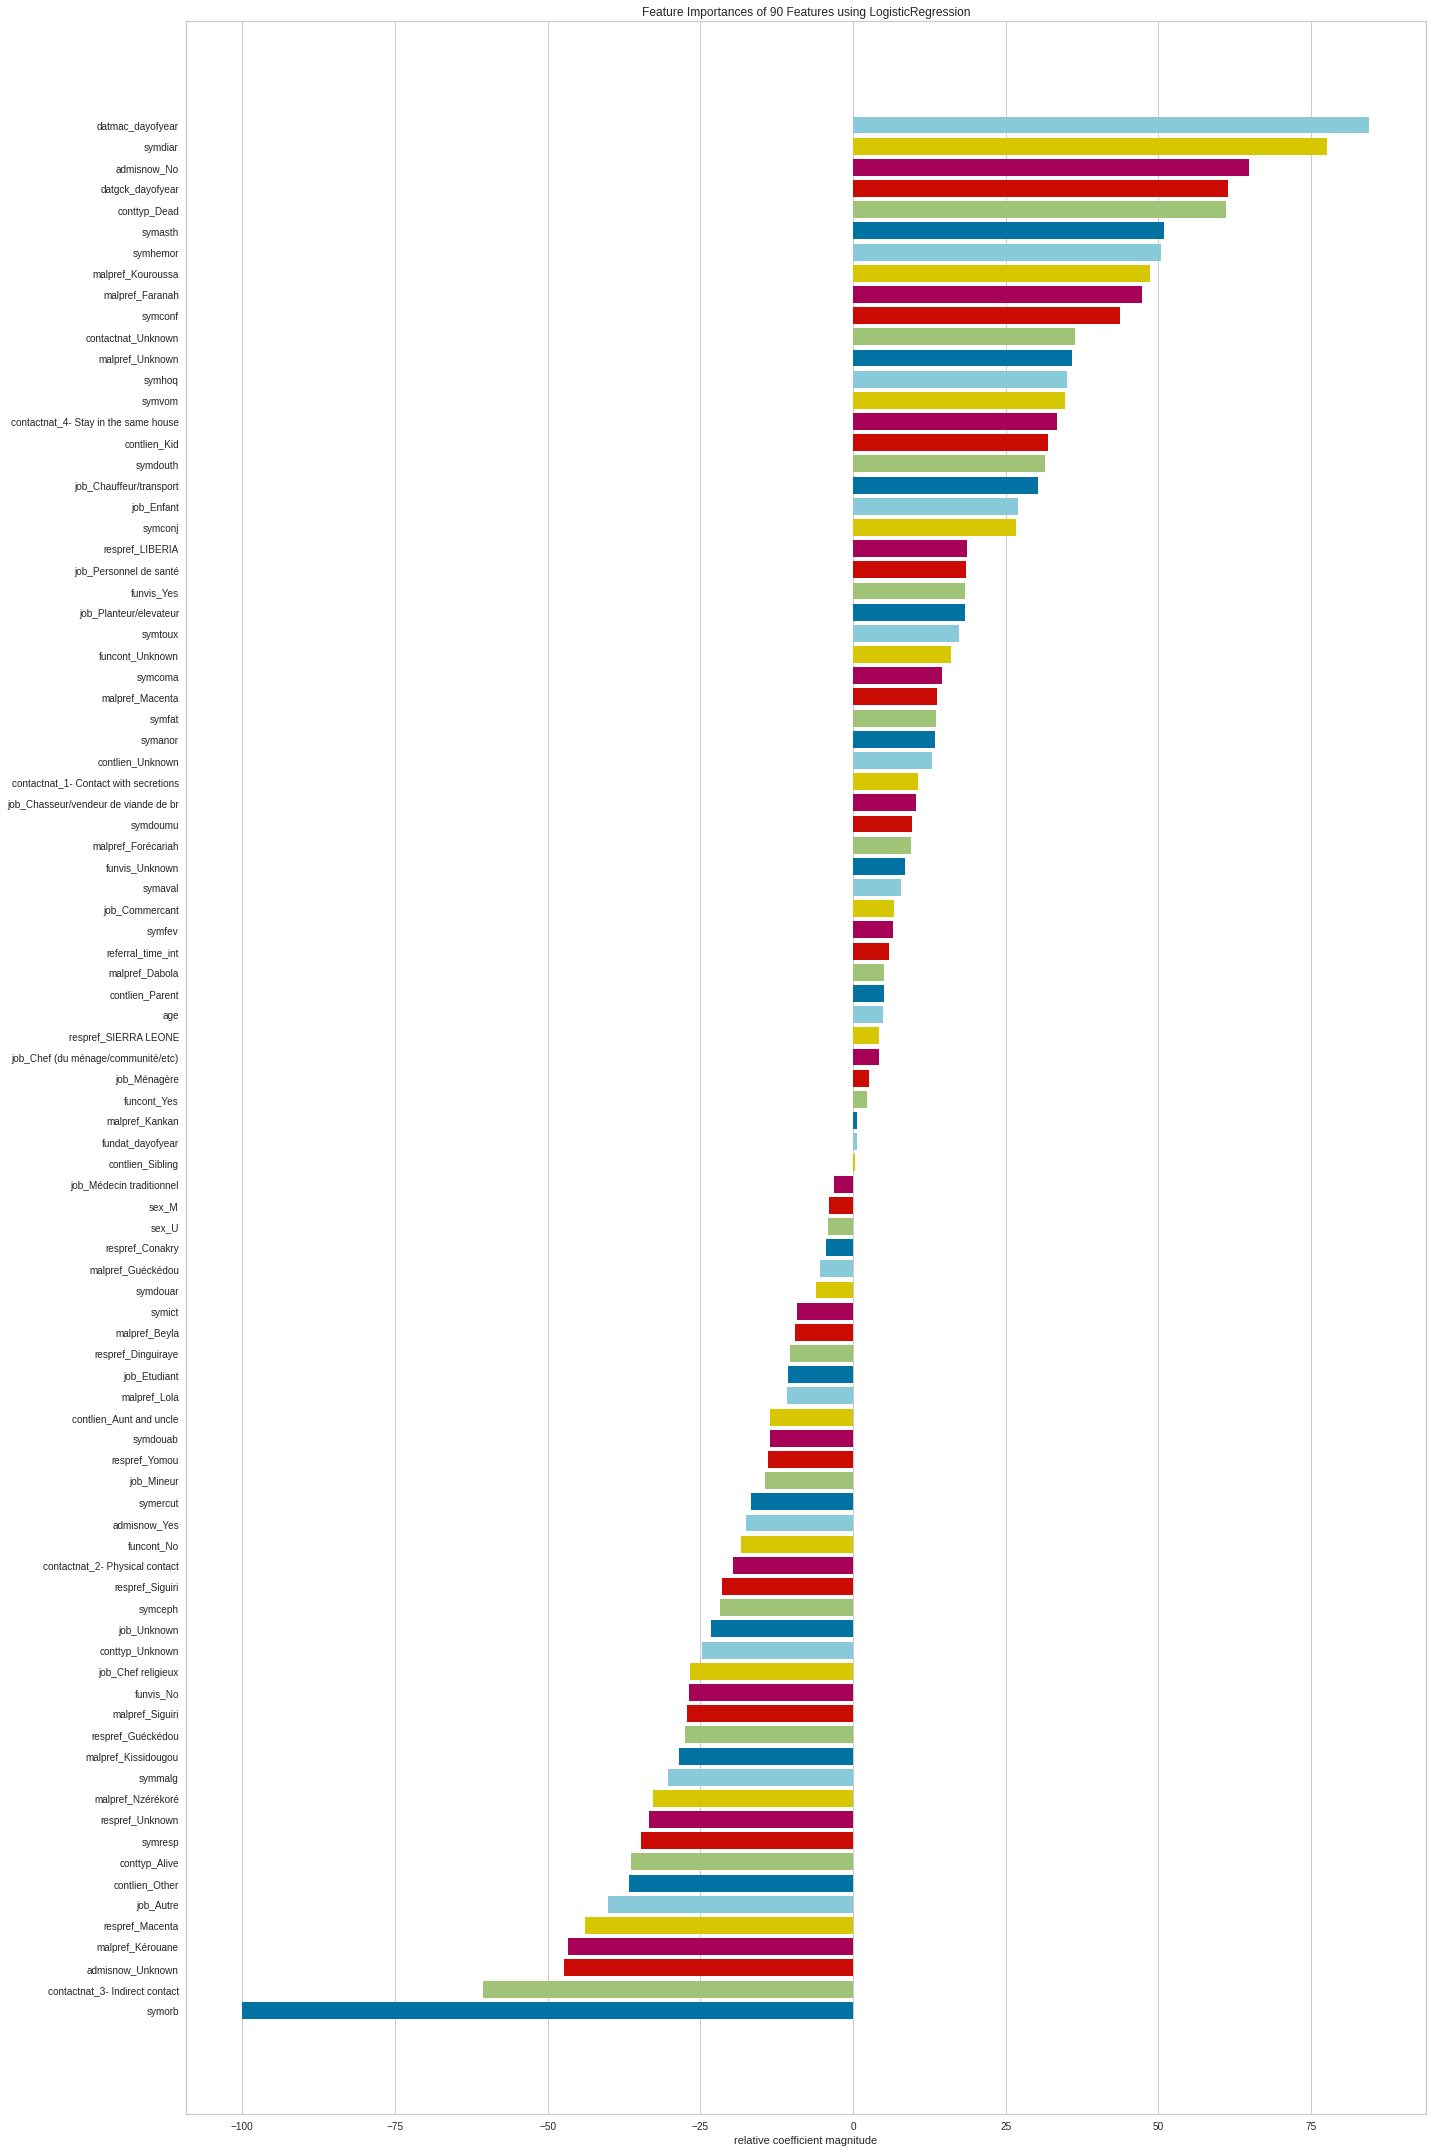

In [302]:
fig, ax = plt.subplots(figsize=(20,30))

viz = FeatureImportances(logit, relative=True)
viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

### Decision tree

     Use of validation curve to determine a plausible area for the hyper-parameters
- max_depth: Maximum depth of tree
- min_samples_split: Data points in nodes before split occurs 

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


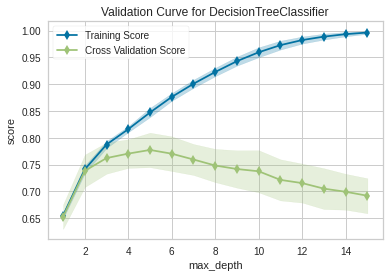

In [303]:
# For max_depth
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=123)

param_range = [1,2,3,4,5,6, 7, 8, 9, 10,11,12,13,14,15]

viz = ValidationCurve(tree.DecisionTreeClassifier(random_state=123), param_name="max_depth", param_range=param_range, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


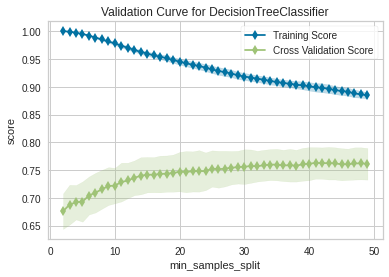

In [304]:
# For min_samples_split

param_range = range(2,50) 

viz = ValidationCurve(tree.DecisionTreeClassifier(random_state=123), param_name="min_samples_split", param_range=param_range, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

In [305]:
clftree = tree.DecisionTreeClassifier(random_state=123)
param_test = {
    'max_depth':[i for i in range(5, 15)],
    'min_samples_split':[i for i in range(2, 20)]
}

In [306]:
gsearch = GridSearchCV( estimator= clftree, param_grid= param_test, scoring='roc_auc', n_jobs=4, iid=False, cv=cv)
gsearch.fit(X_ebo_train, y_ebo_train)
print(gsearch.best_params_)

{'max_depth': 5, 'min_samples_split': 6}


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [307]:
clf_best_tree = tree.DecisionTreeClassifier(
    random_state=123, 
    max_depth=gsearch.best_params_['max_depth'], 
    min_samples_split=gsearch.best_params_['min_samples_split'])
clf_best_tree.fit(X_ebo_train, y_ebo_train)
y_ebo_pred = clf_best_tree.predict(X_ebo_test)
accuracy_test = accuracy_score(y_ebo_test, y_ebo_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_ebo_test, y_ebo_pred)
auc_test = auc(fpr_test, tpr_test)
print("Area Under the curve accuracy on test set: ", auc_test)
print("Accuracy for test set: ",accuracy_test)

Area Under the curve accuracy on test set:  0.6510126486974853
Accuracy for test set:  0.663768115942029


### Random Forest 

    Use of validation curve to determine a plausible area for the hyper-parameters
- n_estimators: Number of trees to build
- max_depth: Maximum depth of tree
- min_samples_split: Data points in nodes before split occurs 

Takes a long time to run

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


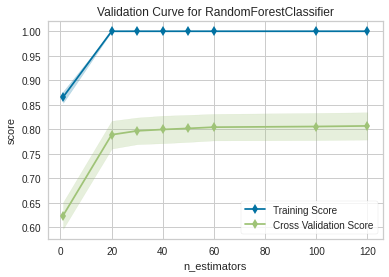

In [308]:
# For n_estimators

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=123)

param_range = [1,20,30, 40,50,60,100,120]

viz = ValidationCurve(RandomForestClassifier(random_state=123), param_name="n_estimators", param_range=param_range, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


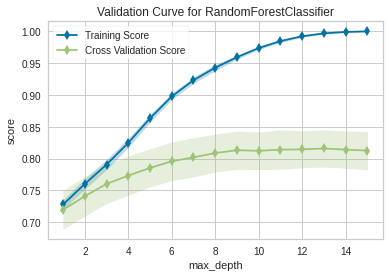

In [309]:
# For max_depth
param_range = [1,2,3,4,5,6, 7, 8, 9, 10,11,12,13,14,15]

viz = ValidationCurve(RandomForestClassifier(random_state=123), param_name="max_depth", param_range=param_range, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


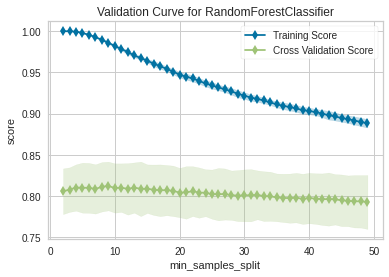

In [310]:
# For min_samples_split

param_range = range(2,50)

viz = ValidationCurve(RandomForestClassifier(random_state=123), param_name="min_samples_split", param_range=param_range, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


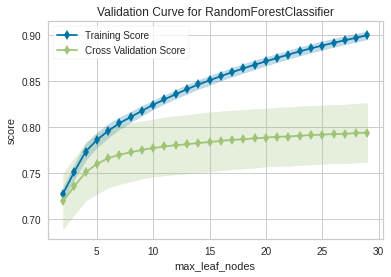

In [311]:
# For max_leaf_nodes
#param_range = [2,3,4,5,6, 7, 8, 9, 10,11,12,13,14,15,16,17]
param_range = range(2, 30)

viz = ValidationCurve(RandomForestClassifier(random_state=123), param_name="max_leaf_nodes", param_range=param_range, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

With only 5 repetitions the variance was too high so we increased the number of repetitions to 10. This did not significantly reduce the variance so we kept 5 repetitions to limit the calculation time. 


#### Hyperparameter tuning for random forest

Now that we have found ranges for the parameters, let's proceed with a cross validation.
Please bare in mind, that these ranges above were given for one hyper-parameter, when combined with multiple others, we should enlarge the range of each one.


In [312]:
parameters = {'n_estimators': [20,30, 40,50,60,100], 'max_depth' : [5,6, 7, 8, 9, 10,11,12,13,14],
              'min_samples_split': range(2,15), 'max_leaf_nodes': range(15,30)}

ebo_forest_classifier = RandomForestClassifier(random_state=123)
clf = GridSearchCV(ebo_forest_classifier, parameters, scoring = 'roc_auc', n_jobs=-1, cv= cv)
clf.fit(X_ebo_train, y_ebo_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=123),
             estimator=RandomForestClassifier(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_leaf_nodes': range(15, 30),
                         'min_samples_split': range(2, 15),
                         'n_estimators': [20, 30, 40, 50, 60, 100]},
             scoring='roc_auc')

In [313]:
# Best parameters to introduce into new model 
clf.best_params_


{'max_depth': 7,
 'max_leaf_nodes': 29,
 'min_samples_split': 11,
 'n_estimators': 60}

RandomForestClassifier:
On training we get an Accuracy 0.7536337209302325, an AUC 0.6579892619479734 and F1 score 0.8366265060240965 
For test we get an Accuracy 0.7072463768115942, an AUC 0.6093208854088239 and F1 score 0.8046421663442941


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


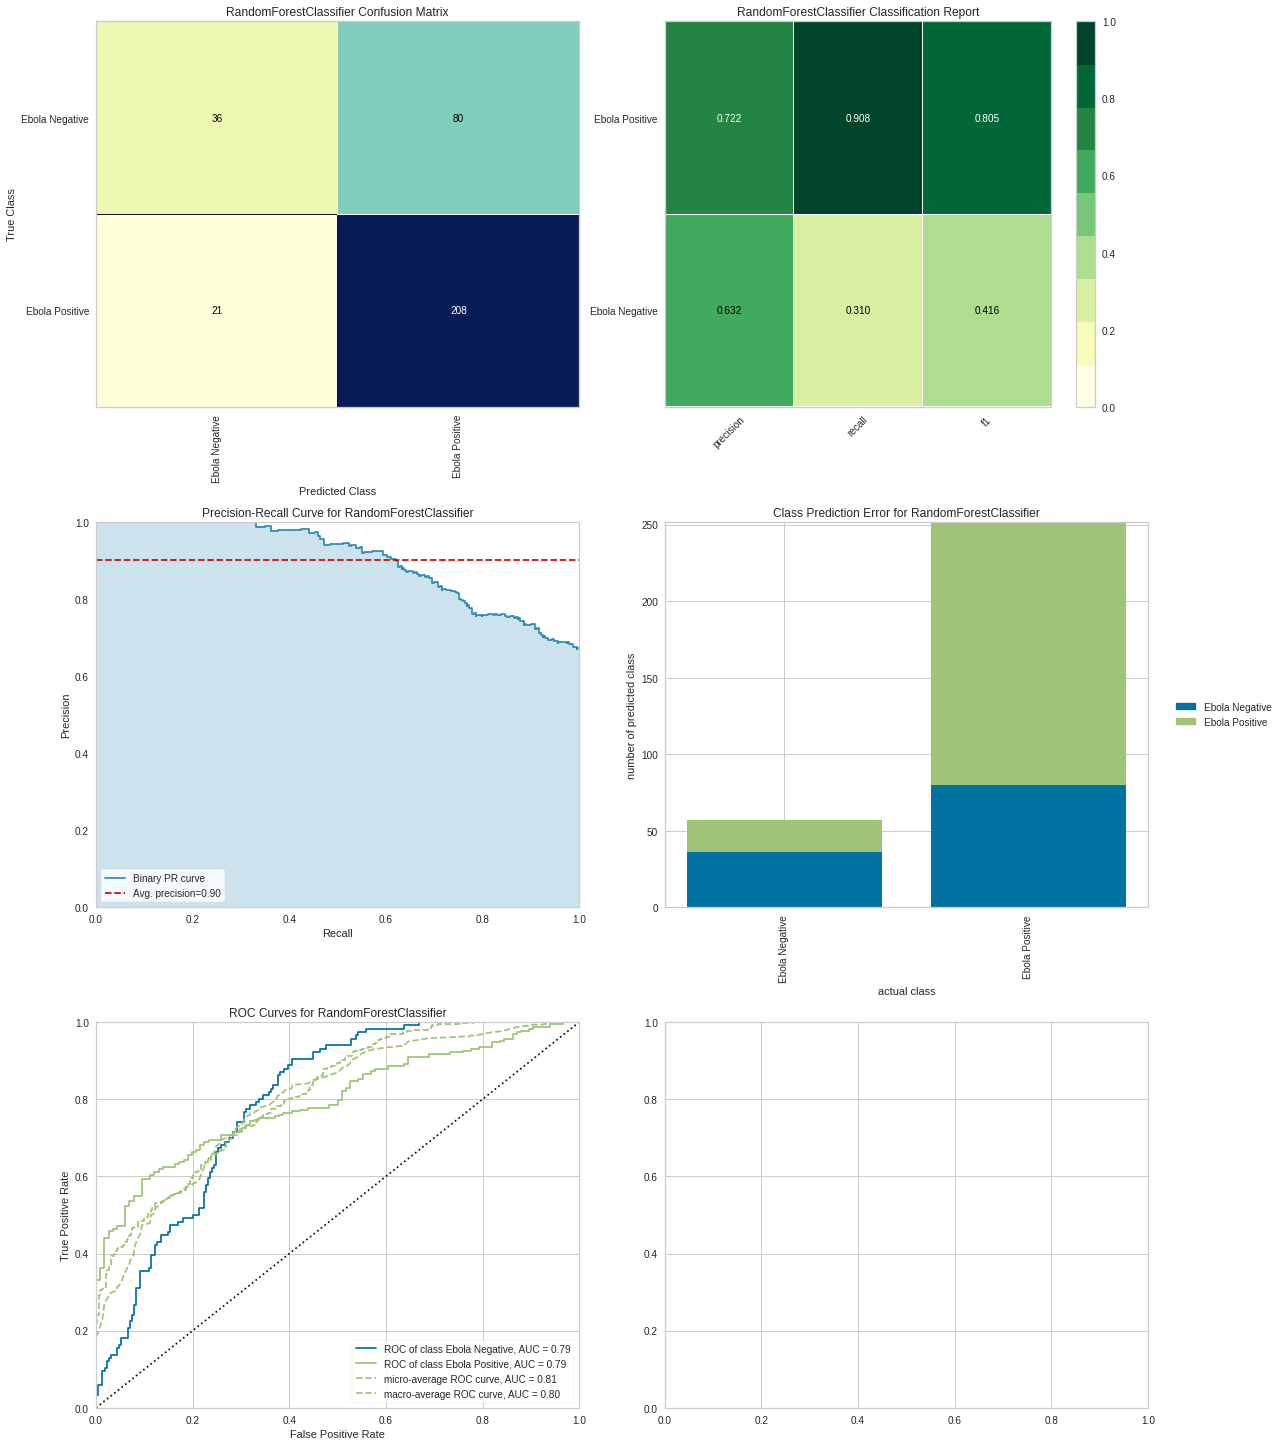

Don't have feature importance




In [314]:
ebo_forest_classifier = RandomForestClassifier(
    random_state=123,
    n_estimators =      clf.best_params_['n_estimators'],
    max_depth =         clf.best_params_['max_depth'],
    min_samples_split = clf.best_params_['min_samples_split'],
    max_leaf_nodes =    clf.best_params_['max_leaf_nodes']
)

# Give score to model
score_model(X_ebo_train, y_ebo_train, X_ebo_test, y_ebo_test, ebo_forest_classifier)

In [316]:
eli5.show_weights(ebo_forest_classifier, feature_names=list(X_ebo_train.columns))

Weight,Feature
0.1675 ± 0.3050,datmac_dayofyear
0.1229 ± 0.1764,datgck_dayofyear
0.1021 ± 0.2529,referral_time_int
0.0504 ± 0.1045,symasth
0.0503 ± 0.1155,symdiar
0.0486 ± 0.0772,age
0.0366 ± 0.1194,admisnow_Unknown
0.0323 ± 0.0998,respref_Guéckédou
0.0252 ± 0.0636,symvom
0.0232 ± 0.0966,symfat


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


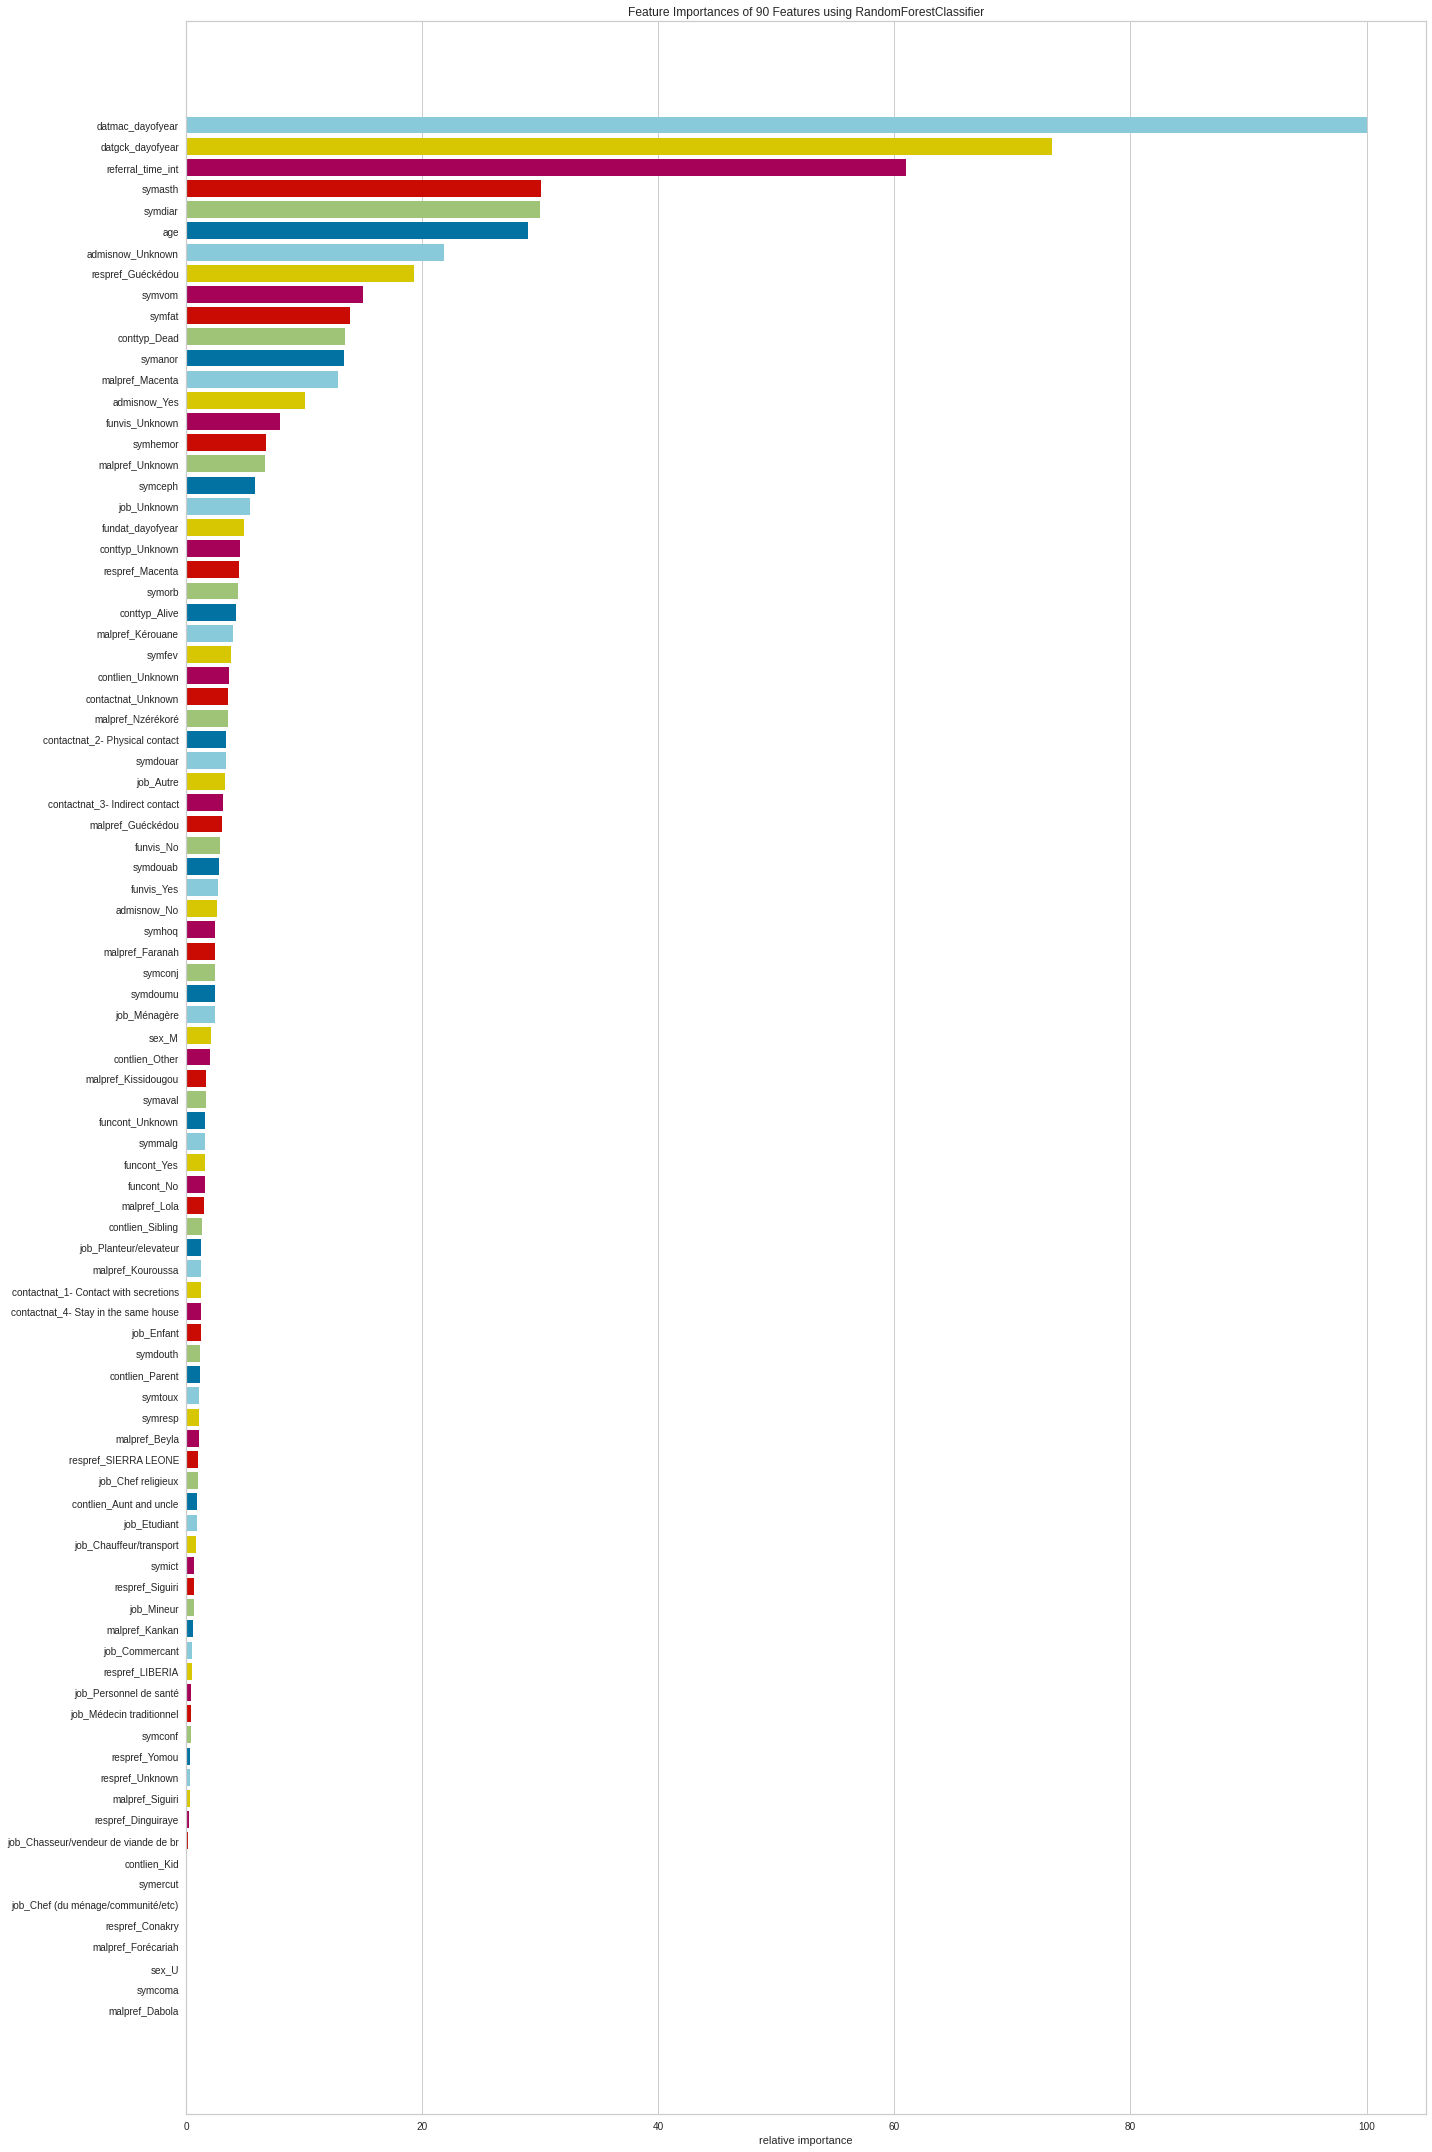

In [317]:
fig, ax = plt.subplots(figsize=(20,30))

viz = FeatureImportances(ebo_forest_classifier, relative=True)
viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

### SVM

Use of validation curve to determine a plausible area for the hyper-parameters
- gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
- C: Regularization parameter (the strength of the regularization is inversely proportional to C)
- kernel: kernel type to be used in the algorithm

For a linear kernel, we just need to optimize the c parameter. However, if we want to use an RBF kernel, both c and gamma parameter need to optimized simultaneously.
So in our case we tune both hyperparameters.

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


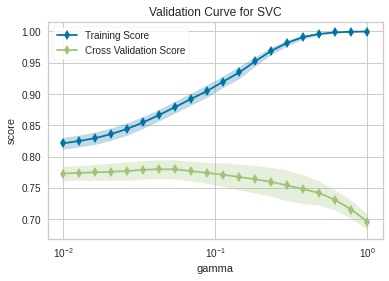

In [318]:
# Validation curve for gamma parameter 
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2,random_state=123)
param_range = np.logspace(-2, 0, 20)

viz = ValidationCurve(SVC(random_state=123), param_name="gamma", param_range=param_range,logx=True, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


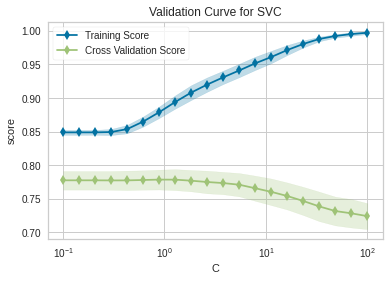

In [319]:
# Validation curve for C parameter 
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2,random_state=123)

param_range = np.logspace(-1, 2, 20)

viz = ValidationCurve(SVC(random_state=123), param_name="C", param_range=param_range,logx=True, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

In [320]:
# The first time we ran the code we saw that it was "rbf"
# Runs for too long if inputing "linear", "poly", "rbf"
parameters = {'kernel':['rbf'], 'C': np.logspace(1, 2, 30), 'gamma' : np.logspace(-2, 0, 30)}
svc = svm.SVC(random_state=123)

clf = GridSearchCV(svc, parameters, scoring = 'roc_auc', n_jobs=-1, cv=cv)
clf.fit(X_ebo_train, y_ebo_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=2, random_state=123),
             estimator=SVC(random_state=123), n_jobs=-1,
             param_grid={'C': array([ 10.        ,  10.82636734,  11.72102298,  12.68961003,
        13.73823796,  14.87352107,  16.10262028,  17.43328822,
        18.87391822,  20.43359718,  22.12216291,  23.9502662 ,
        25.92943797,  28.07216204,  30.39195382,  32.90344562,
        35.6224789 ,  38.5662042...
                         'gamma': array([0.01      , 0.01172102, 0.01373824, 0.01610262, 0.01887392,
       0.02212216, 0.02592944, 0.03039195, 0.03562248, 0.04175319,
       0.04893901, 0.05736153, 0.06723358, 0.07880463, 0.09236709,
       0.10826367, 0.1268961 , 0.14873521, 0.17433288, 0.20433597,
       0.23950266, 0.28072162, 0.32903446, 0.38566204, 0.45203537,
       0.52983169, 0.62101694, 0.72789538, 0.85316785, 1.        ]),
                         'kernel': ['rbf']},
             scoring='roc_auc')

In [321]:
clf.best_params_

{'C': 10.0, 'gamma': 0.01373823795883263, 'kernel': 'rbf'}

SVC:
On training we get an Accuracy 0.7914244186046512, an AUC 0.7648404416212946 and F1 score 0.8432550518842162 
For test we get an Accuracy 0.7130434782608696, an AUC 0.67962279777142 and F1 score 0.7833698030634574


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


Can plot ROC curve for this model
Don't have feature importance


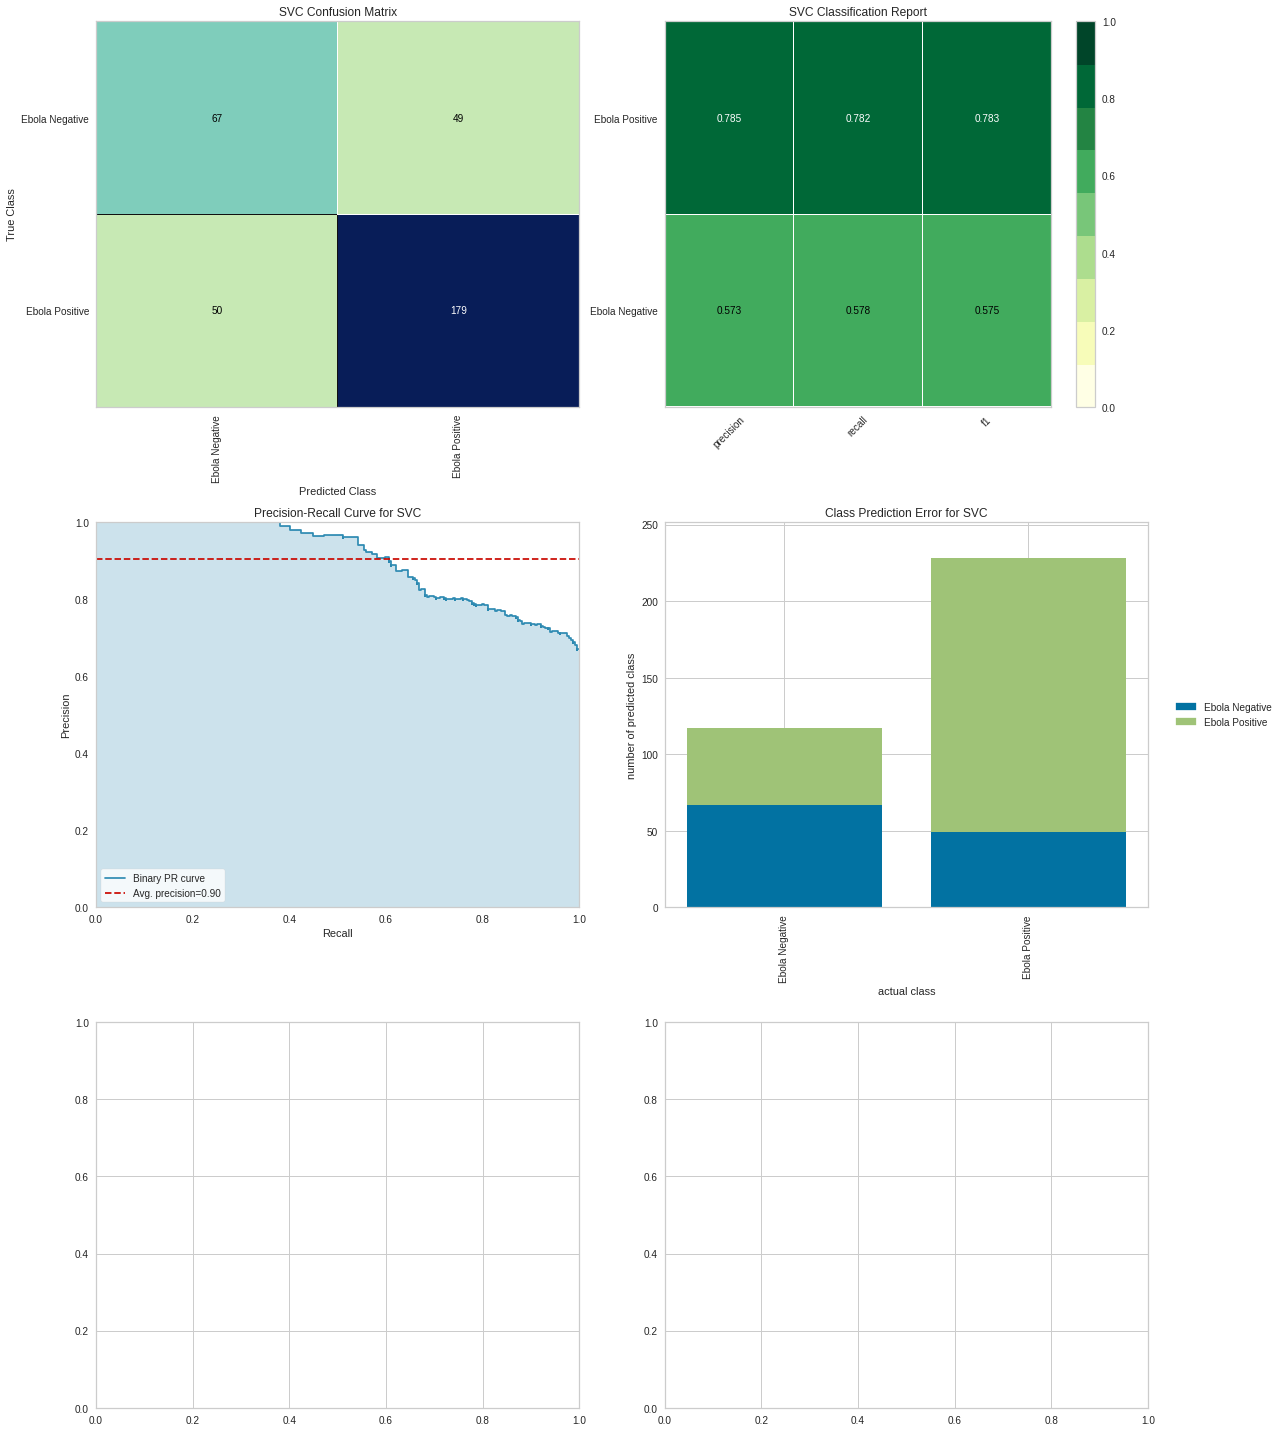

In [322]:
svc = svm.SVC(
    random_state = 123,
    C =      clf.best_params_['C'], 
    gamma =  clf.best_params_['gamma'], 
    kernel = clf.best_params_['kernel'])
score_model(X_ebo_train, y_ebo_train, X_ebo_test, y_ebo_test, svc)

#### Recursive Feature Elimination (RFE) 

In [323]:
logreg = LogisticRegression(solver='lbfgs', max_iter=250)
logreg.fit(X_ebo_train, y_ebo_train)
rfe = RFE(logreg, n_features_to_select=1)
rfe = rfe.fit(X_ebo_train, y_ebo_train)
order = rfe.ranking_

In [324]:
# Uncomment to print
# sorted(zip(order, X_ebo_train.columns))

# "Improved" models using SelectKBest for feature selection

In [325]:
models = [
    LogisticRegression(random_state = 123, solver='lbfgs', max_iter = 300),
    tree.DecisionTreeClassifier(random_state=123),
    RandomForestClassifier(random_state = 123, n_estimators=300),    
    SVC(random_state=123)
]

In [326]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
num_features = [i+1 for i in range(X_ebo_train.shape[1])]
results = list()

for k in num_features:

    model = SVC(random_state=123)
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
    # evaluate the model
    scores = evaluate_model(pipeline, X_ebo_train, y_ebo_train)
    results.append(scores)
    if k%10 == 0:
        print('>%d %.3f (%.3f)' % (k, np.mean(scores), np.std(scores)))

>10 0.731 (0.052)
>20 0.782 (0.026)
>30 0.779 (0.036)
>40 0.781 (0.032)
>50 0.782 (0.032)
>60 0.785 (0.033)
>70 0.787 (0.032)
>80 0.786 (0.034)
>90 0.787 (0.034)


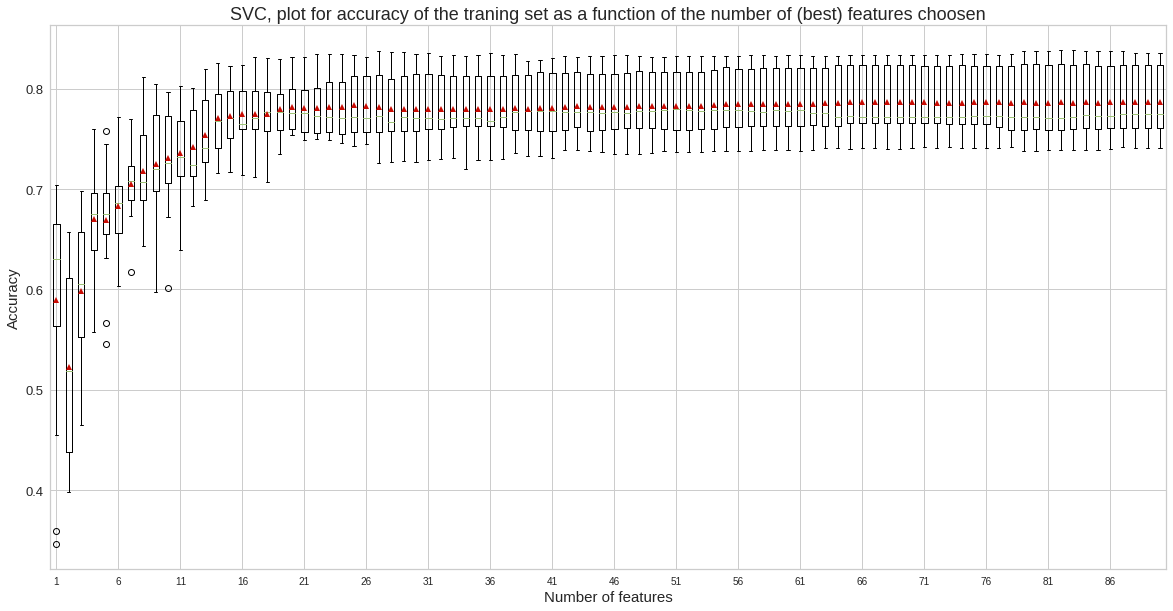

In [327]:
fig, ax = plt.subplots(figsize=(20,10))
plt.boxplot(results, labels=num_features, showmeans=True)
plt.title("SVC, plot for accuracy of the traning set as a function of the number of (best) features choosen", fontsize = 18)
ax.set_xlabel('Number of features', fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)

max_value = max(num_features)
min_value = min(num_features)
number_of_steps = 5
l = np.arange(min_value, max_value+1, number_of_steps)

ax.set(xticks=l, xticklabels=l)

ax.tick_params(axis='y', which='major', labelsize=13)
plt.show()

In [328]:
grid = dict()
grid['anova__k'] = [i+1 for i in range(X_ebo_train.shape[1])]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
search = GridSearchCV(pipeline, grid, scoring='roc_auc', n_jobs=-1, cv=cv)
results = search.fit(X_ebo_train, y_ebo_train)

print('Best Mean AUC ROC: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean AUC ROC: 0.787
Best Config: {'anova__k': 87}


### Best K for all models 

In [329]:
grid = dict()
grid['anova__k'] = [i+1 for i in range(X_ebo_train.shape[1])]
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)

dict_model_ftest_features_number = {}

for model in models:
    pipeline = Pipeline(steps=[('anova',fs), ('model', model)])
    search = GridSearchCV(pipeline, grid, scoring='roc_auc', n_jobs=-1, cv=cv)
    results = search.fit(X_ebo_train, y_ebo_train)
    print("{}:".format(model.__class__.__name__))
    print('Best Mean AUC ROC: %.3f' % results.best_score_)
    print('Best Config: %s' % results.best_params_)
    dict_model_ftest_features_number[model] = results.best_params_

LogisticRegression:
Best Mean AUC ROC: 0.776
Best Config: {'anova__k': 70}
DecisionTreeClassifier:
Best Mean AUC ROC: 0.750
Best Config: {'anova__k': 8}
RandomForestClassifier:
Best Mean AUC ROC: 0.810
Best Config: {'anova__k': 85}
SVC:
Best Mean AUC ROC: 0.787
Best Config: {'anova__k': 87}


LogisticRegression(max_iter=300, random_state=123)
70
SelectKBest(k=70)
LogisticRegression:
On training we get an Accuracy 0.7369186046511628, an AUC 0.6840214761040533 and F1 score 0.8100734522560336 
For test we get an Accuracy 0.7043478260869566, an AUC 0.6539301310043668 and F1 score 0.7838983050847458


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


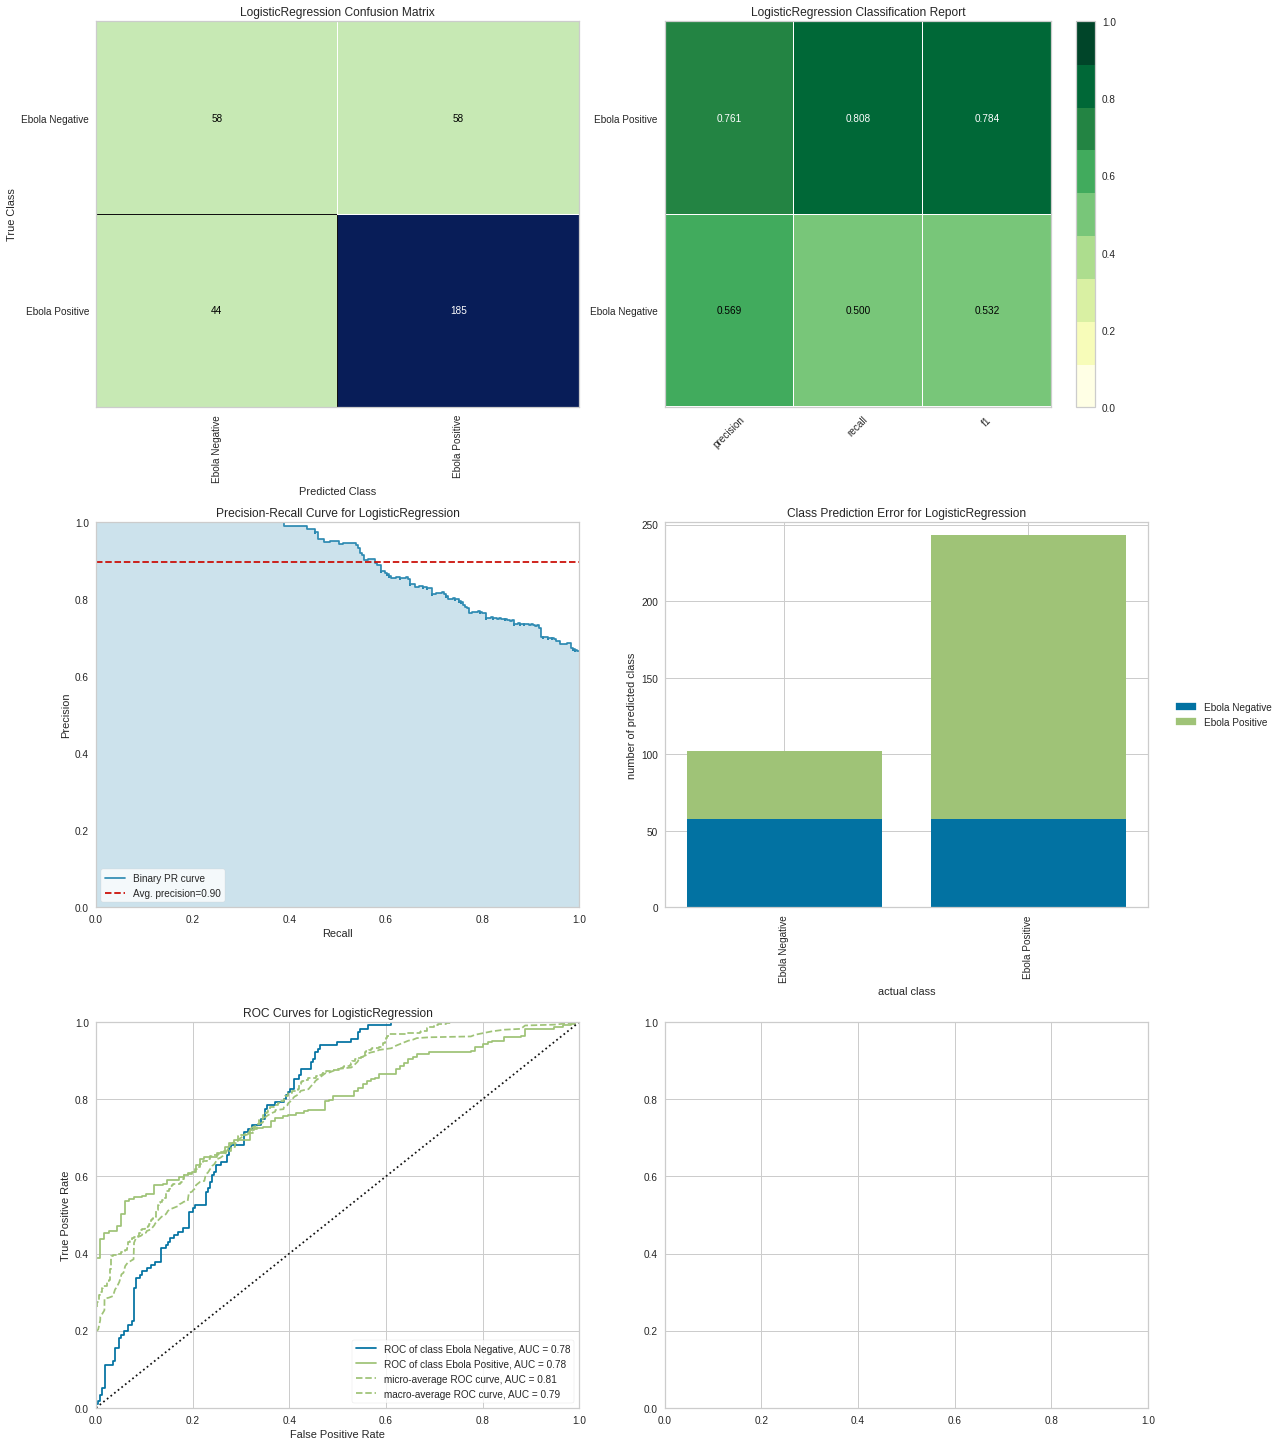

Don't have feature importance


DecisionTreeClassifier(random_state=123)
8
SelectKBest(k=8)
DecisionTreeClassifier:
On training we get an Accuracy 0.7492732558139535, an AUC 0.7060458257713248 and F1 score 0.8159999999999998 
For test we get an Accuracy 0.6840579710144927, an AUC 0.6450271043517544 and F1 score 0.7625272331154684


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


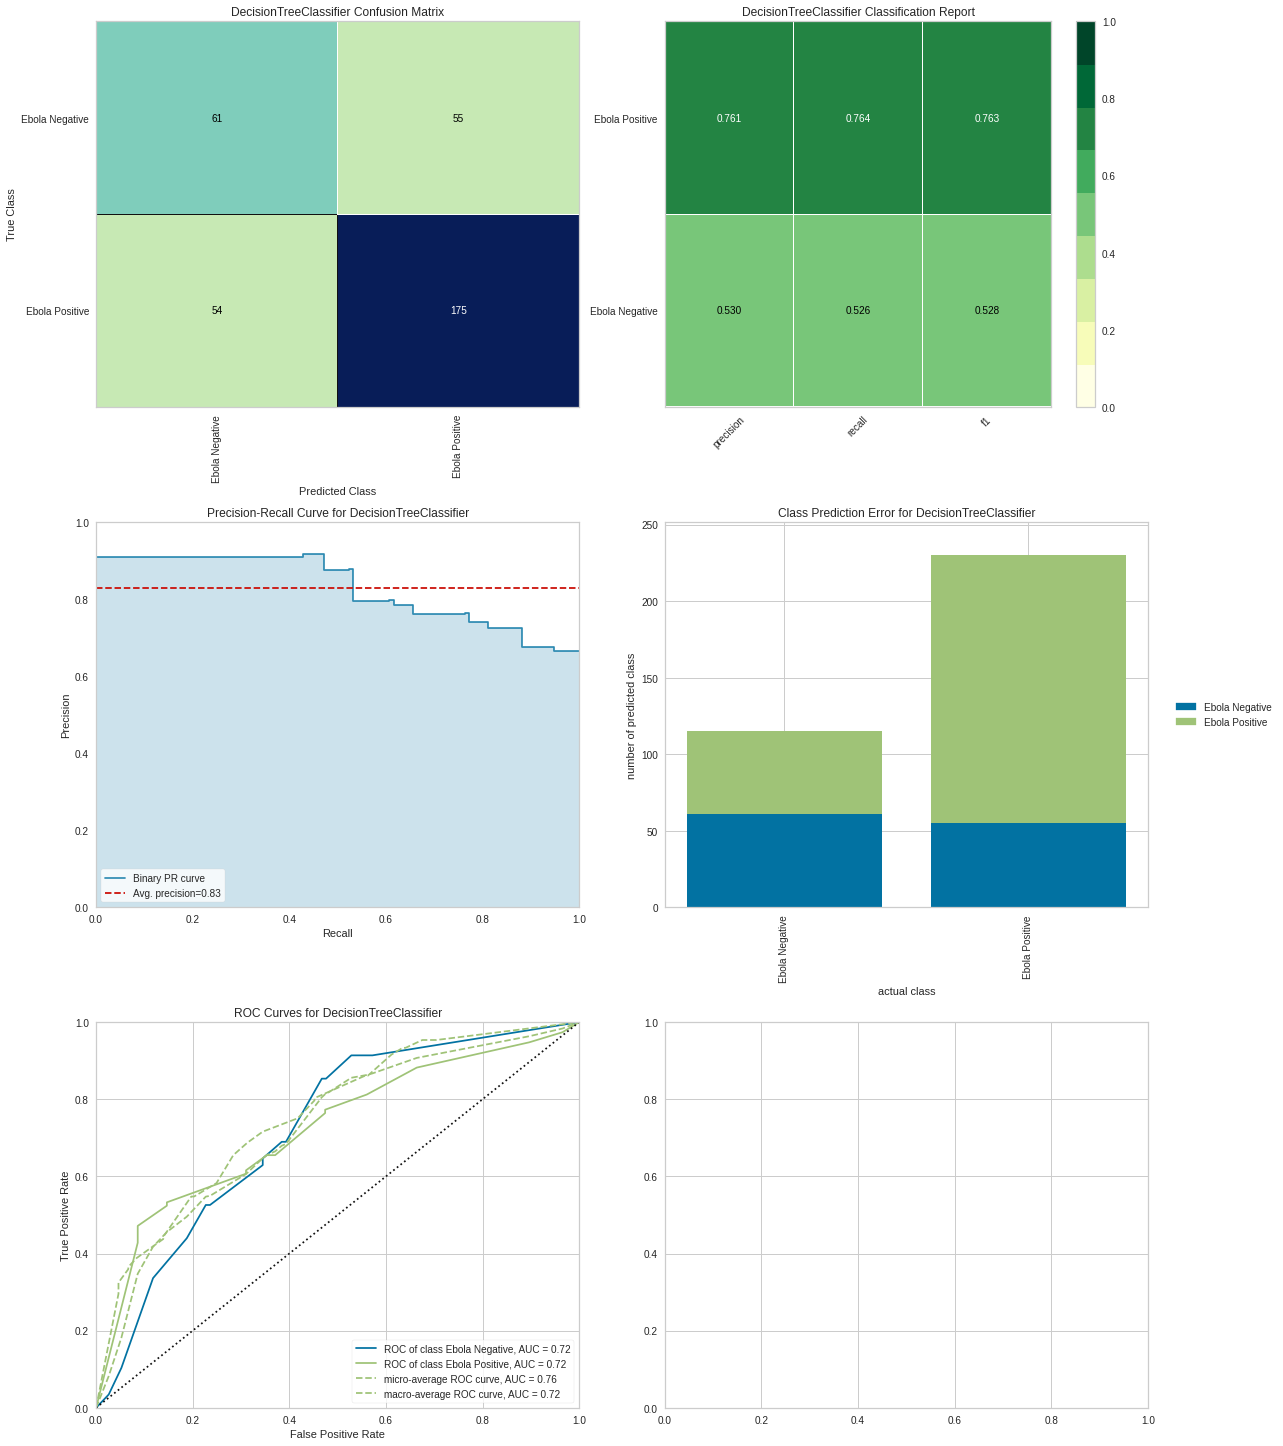

Don't have feature importance


RandomForestClassifier(n_estimators=300, random_state=123)
85
SelectKBest(k=85)
RandomForestClassifier:
On training we get an Accuracy 1.0, an AUC 1.0 and F1 score 1.0 
For test we get an Accuracy 0.7594202898550725, an AUC 0.7124303568739648 and F1 score 0.8252631578947369


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


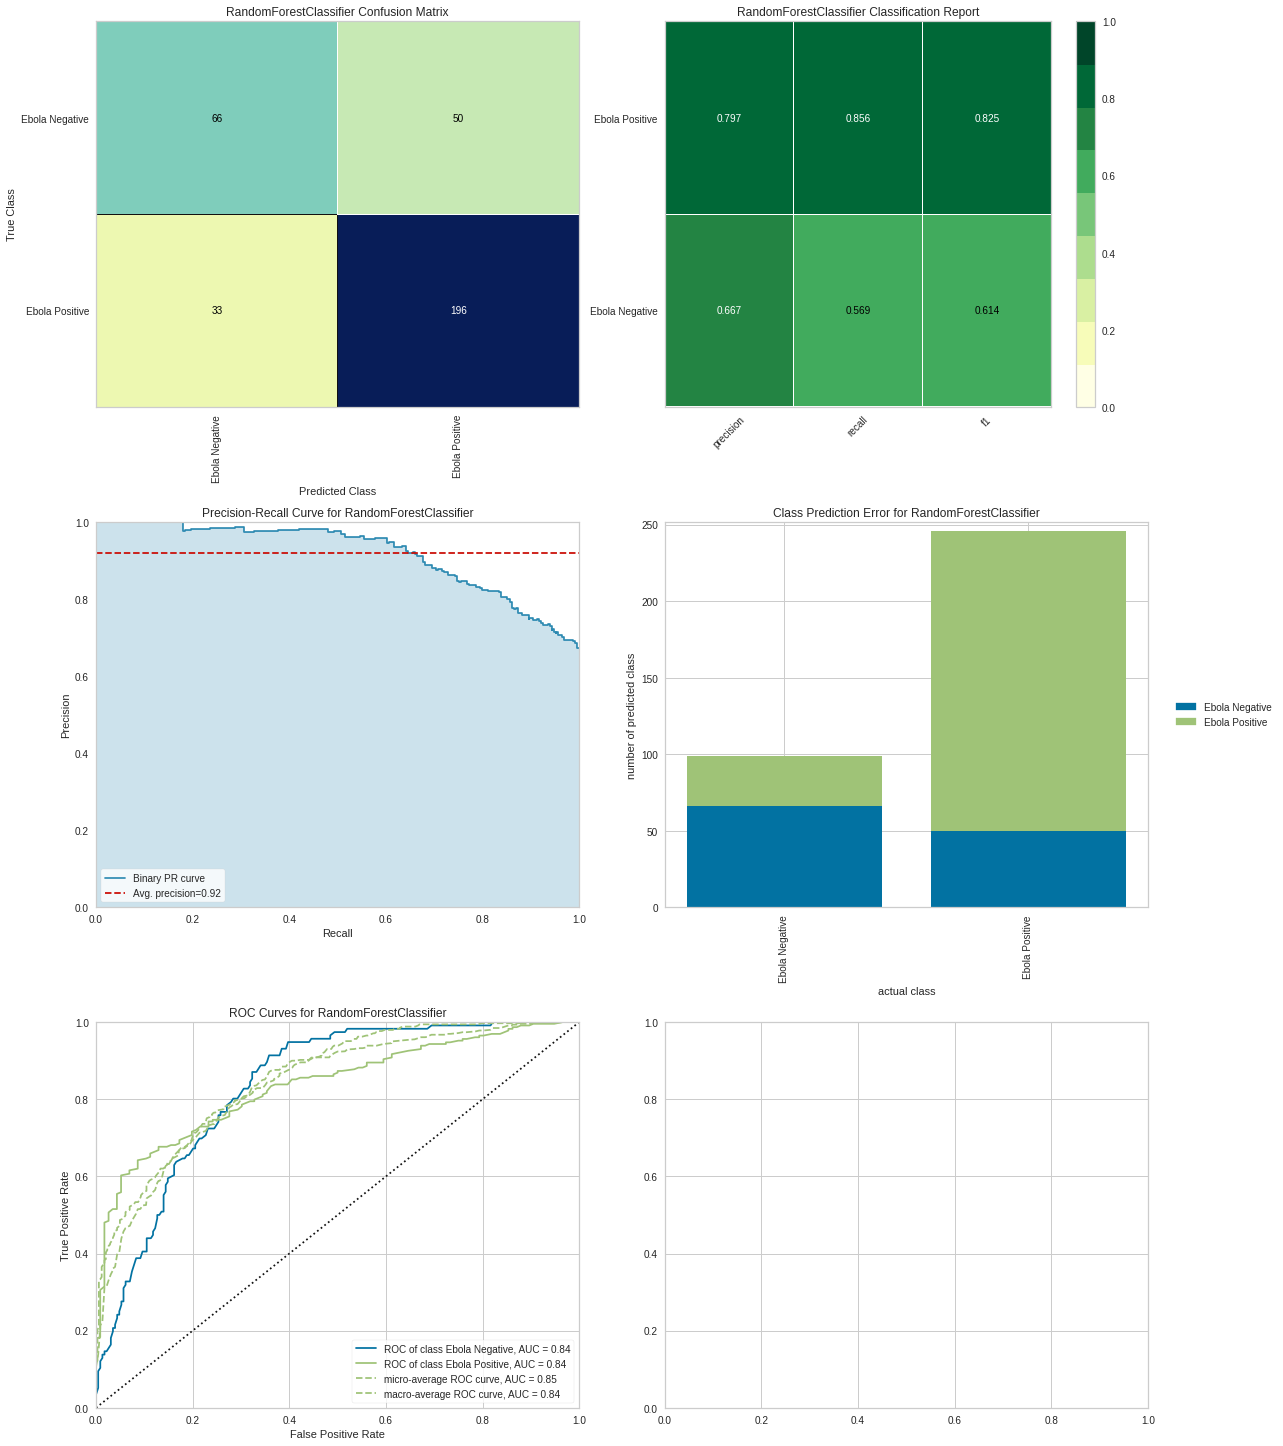

Don't have feature importance


SVC(random_state=123)
87
SelectKBest(k=87)
SVC:
On training we get an Accuracy 0.7936046511627907, an AUC 0.7601330913490624 and F1 score 0.8471474703982776 
For test we get an Accuracy 0.7188405797101449, an AUC 0.6712279777141996 and F1 score 0.7940552016985137


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


Can plot ROC curve for this model
Don't have feature importance


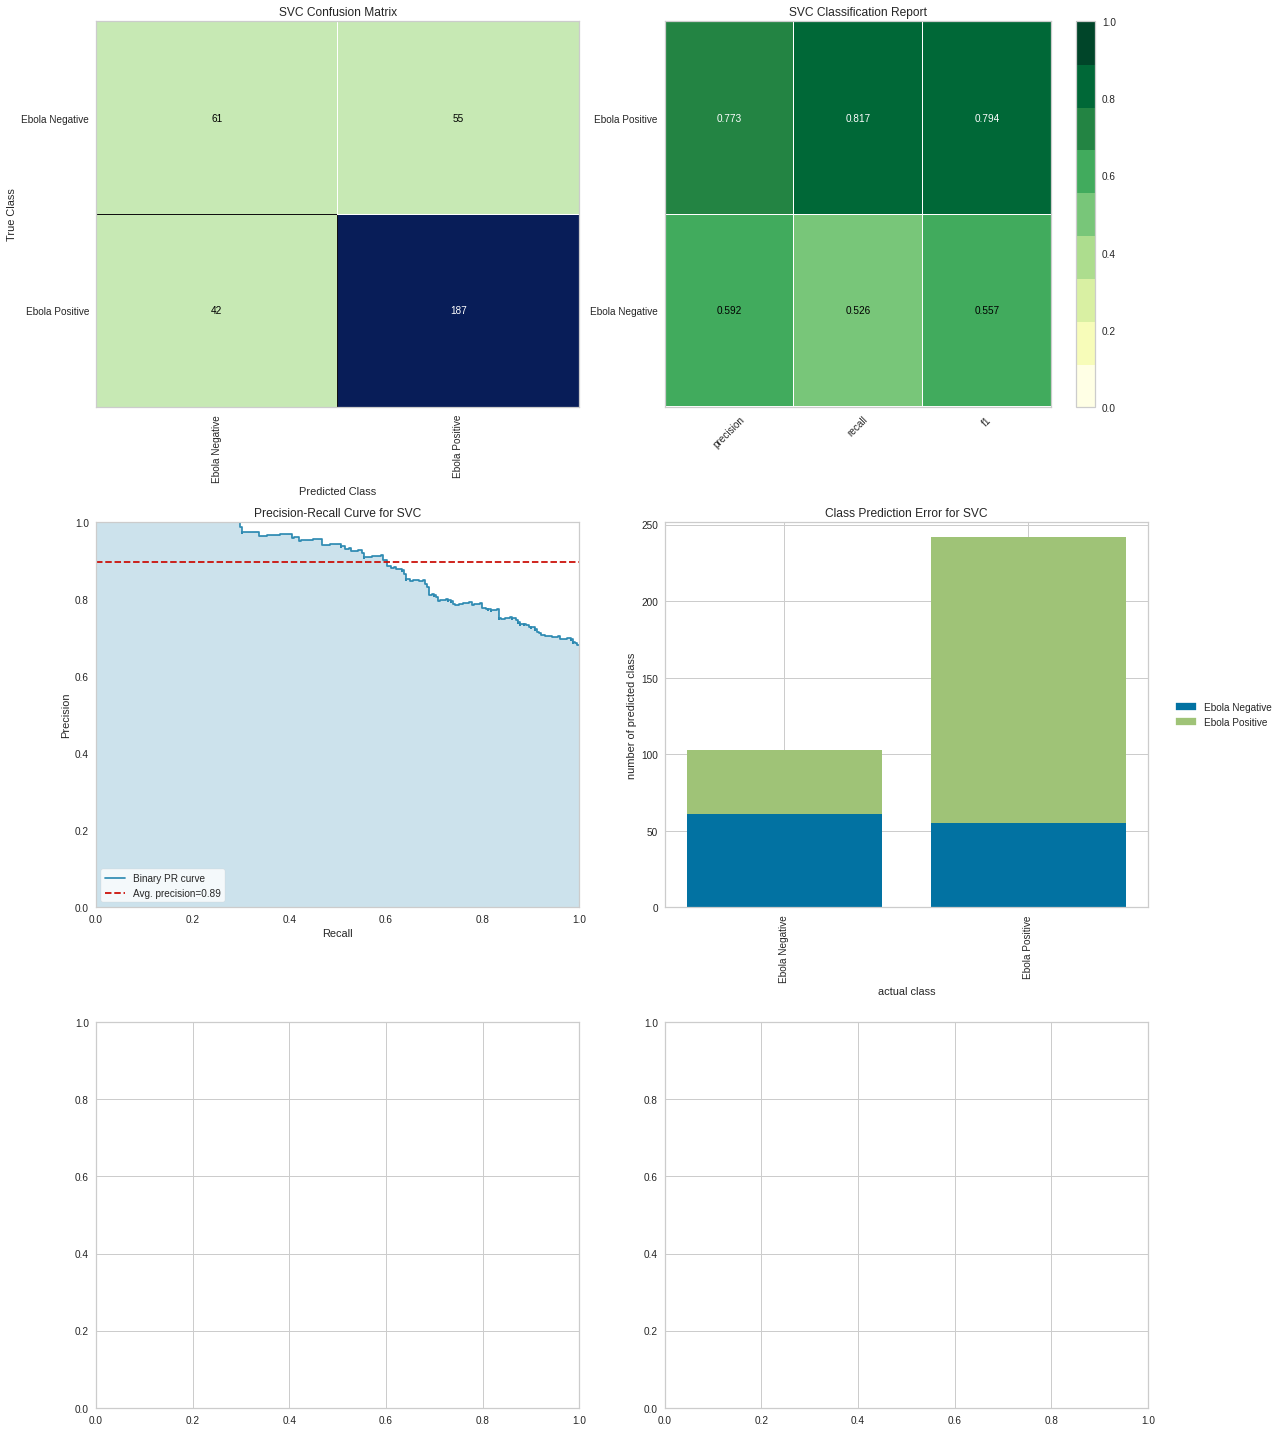

In [330]:
for model in models: 
    print(model)
    print(dict_model_ftest_features_number[model]['anova__k'])
    fs = SelectKBest(score_func=f_classif, k=dict_model_ftest_features_number[model]['anova__k'])
    print(fs)
    X_train_sel_ftest = fs.fit_transform(X_ebo_train, y_ebo_train)
    X_test_sel_ftest = fs.transform(X_ebo_test)
    score_model(X_train_sel_ftest, y_ebo_train, X_test_sel_ftest, y_ebo_test, model)

### Machine Learning Models

### SVM

For a linear kernel, we just need to optimize the c parameter. However, if we want to use an RBF kernel, both c and gamma parameter need to optimized simultaneously.
So in our case we tune both hyperparameters.

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


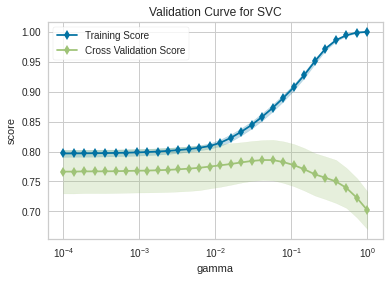

In [331]:
# Validation curve for gamma parameter 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=123)

param_range = np.logspace(-4, 0, 30)

viz = ValidationCurve(SVC(random_state=123), param_name="gamma", param_range=param_range,logx=True, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


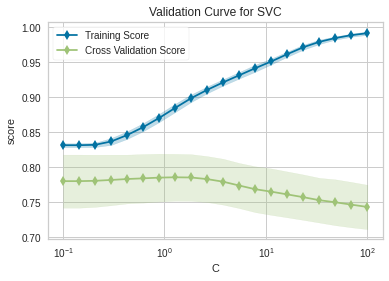

In [332]:
# Validation curve for C parameter 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=123)
param_range = np.logspace(-1, 2, 20)

viz = ValidationCurve(SVC(random_state=123), param_name="C", param_range=param_range,logx=True, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

In [334]:
# Found above
best_k = dict_model_ftest_features_number[models[3]]['anova__k']
# Still need to run SVC
# We will run only rbf as we expect it to be the best and otherwise takes too long to run
parameters = {'anova__k': [best_k] ,'model__kernel':['rbf'], 'model__C': np.logspace(-1, 1, 20), 'model__gamma' : np.logspace(-2, 0, 20)}
svc = svm.SVC(random_state=123)


fs = SelectKBest(score_func=f_classif, k= best_k)
pipeline = Pipeline(steps=[('anova',fs), ('model', svc)])

## Find scores and best parameters 
fit_best = fs.fit(X_ebo_train,y_ebo_train)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=123)

clf = GridSearchCV(pipeline, parameters, scoring = 'roc_auc', n_jobs=-1, cv = cv)

clf.fit(X_ebo_train, y_ebo_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=123),
             estimator=Pipeline(steps=[('anova', SelectKBest(k=87)),
                                       ('model', SVC(random_state=123))]),
             n_jobs=-1,
             param_grid={'anova__k': [87],
                         'model__C': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
                         'model__gamma': array([0.01      , 0.01274275, 0.01623777, 0.02069138, 0.02636651,
       0.03359818, 0.04281332, 0.05455595, 0.06951928, 0.08858668,
       0.11288379, 0.14384499, 0.18329807, 0.23357215, 0.29763514,
       0.37926902, 0.48329302, 0.61584821, 0.78475997, 1.        ]),
                         'model__kernel': ['rbf']},
             sc

In [335]:
clf.best_score_

0.791742154513405

SVC:
On training we get an Accuracy 0.8037790697674418, an AUC 0.7799833635813672 and F1 score 0.8521358159912377 
For test we get an Accuracy 0.7275362318840579, an AUC 0.6905398283391055 and F1 score 0.7965367965367964


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


Can plot ROC curve for this model
Don't have feature importance


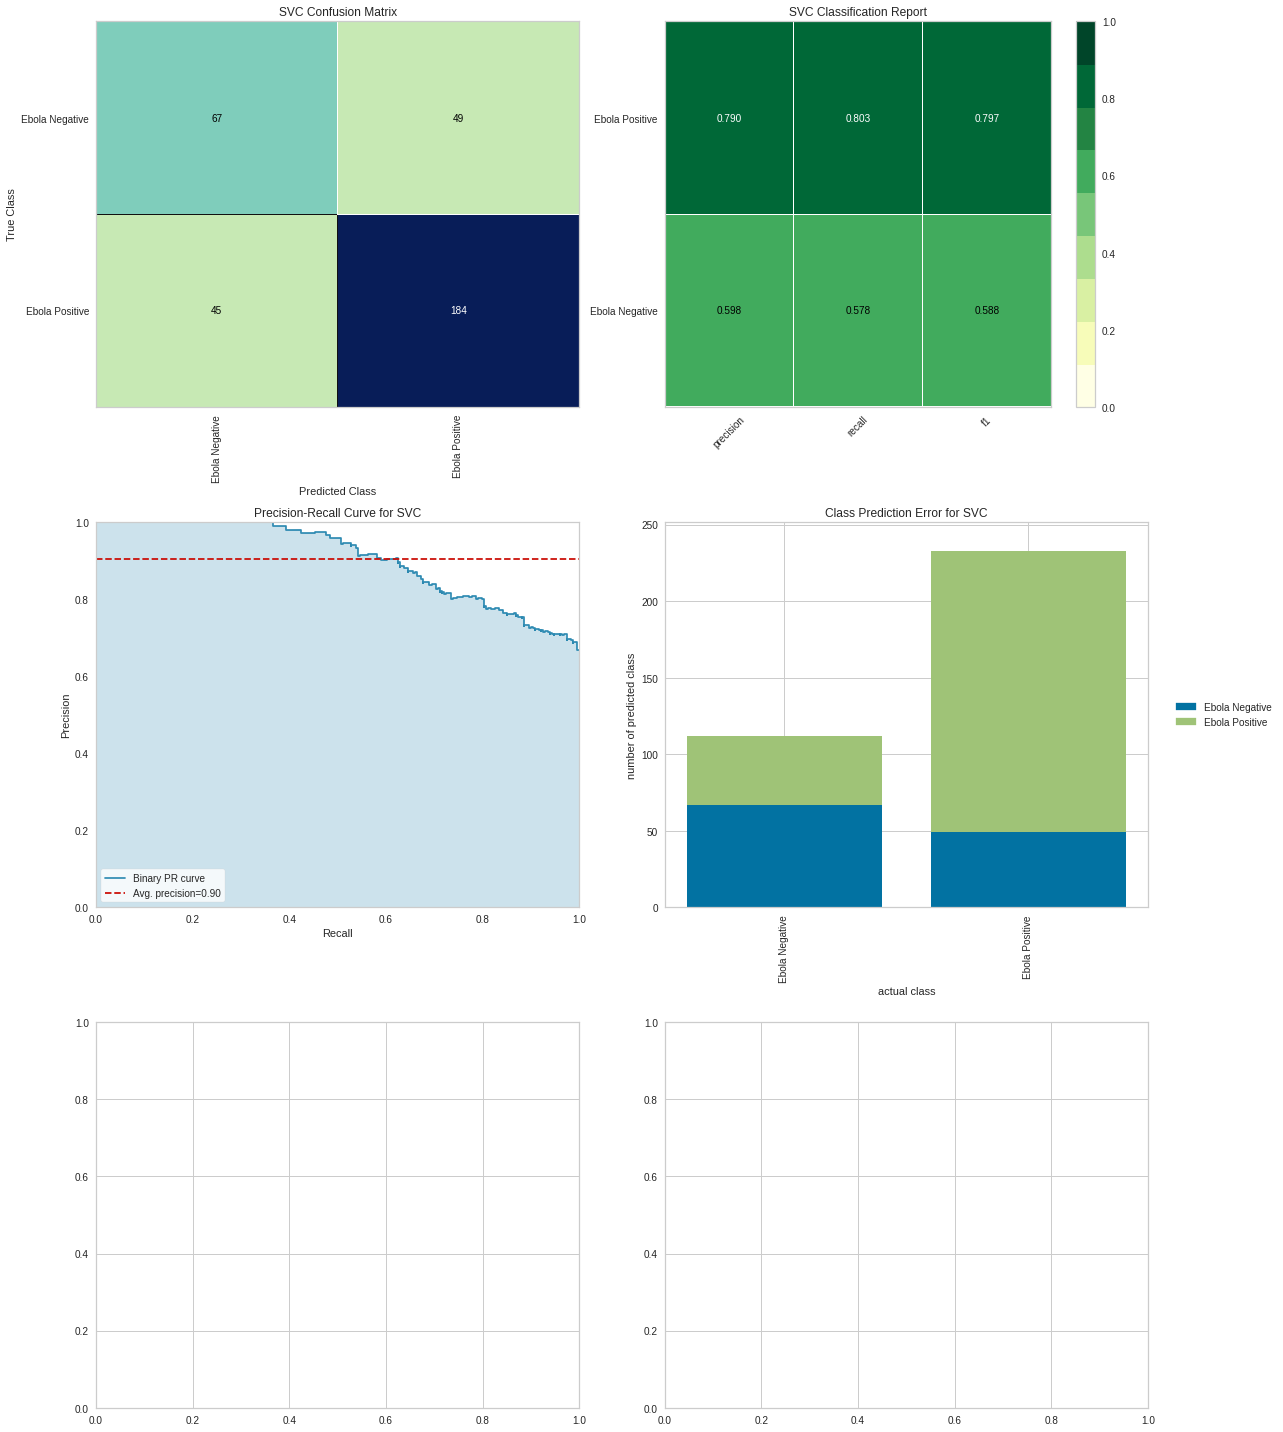

In [336]:
svc = svm.SVC(
    random_state=123,
    C= clf.best_params_['model__C'], 
    gamma = clf.best_params_['model__gamma'], 
    kernel = clf.best_params_['model__kernel']
)


### Add the fs.transform and fs.transform_fit
X_train_sel_ftest = fs.fit_transform(X_ebo_train, y_ebo_train)
X_test_sel_ftest = fs.transform(X_ebo_test)

score_model(X_train_sel_ftest, y_ebo_train, X_test_sel_ftest, y_ebo_test, svc)


##### The most important features are the following

In [337]:
X_ebo_train.columns[fs.get_support()]

Index(['age', 'datmac_dayofyear', 'datgck_dayofyear', 'sex_M', 'symfev',
       'symvom', 'symdiar', 'symfat', 'symanor', 'symdouab', 'symdouth',
       'symdoumu', 'symdouar', 'symceph', 'symtoux', 'symresp', 'symaval',
       'symmalg', 'symconj', 'symercut', 'symhoq', 'symorb', 'symcoma',
       'symconf', 'symasth', 'symhemor', 'respref_Conakry',
       'respref_Dinguiraye', 'respref_Guéckédou', 'respref_LIBERIA',
       'respref_Macenta', 'respref_SIERRA LEONE', 'respref_Siguiri',
       'respref_Unknown', 'respref_Yomou', 'admisnow_No', 'admisnow_Unknown',
       'admisnow_Yes', 'job_Autre', 'job_Chasseur/vendeur de viande de br',
       'job_Chauffeur/transport', 'job_Chef (du ménage/communité/etc)',
       'job_Chef religieux', 'job_Commercant', 'job_Enfant', 'job_Etudiant',
       'job_Médecin traditionnel', 'job_Ménagère', 'job_Personnel de santé',
       'job_Planteur/elevateur', 'job_Unknown', 'malpref_Beyla',
       'malpref_Dabola', 'malpref_Faranah', 'malpref_Forécariah'

In [338]:
#### Scores of most important features


dfscores = pd.DataFrame(fit_best.scores_)

dfcolumns = pd.DataFrame(X_ebo_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
feat_score_svm = featureScores.nlargest(best_k,'Score')
print(featureScores.nlargest(best_k,'Score'))  #print 10 best features
#eli5.show_weights(svc, feature_names=list(X_ebo_train.columns))

                  Features       Score
1         datmac_dayofyear  151.530575
68       referral_time_int   90.075590
38        admisnow_Unknown   67.648274
8                   symfat   57.650100
39            admisnow_Yes   56.667632
..                     ...         ...
50            job_Ménagère    0.037230
60     malpref_Kissidougou    0.024533
59          malpref_Kankan    0.014835
80           conttyp_Alive    0.012829
52  job_Planteur/elevateur    0.001179

[87 rows x 2 columns]


This gives the weight associated to each feature, i.e. contribution of each feature into predicting that the class will be y=1 (the patient has ebola).

### Logistic regression

Logistic regression does not really have any critical hyperparameters to tune. But we can add a penalty term (regularization) whose strength is C. 

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


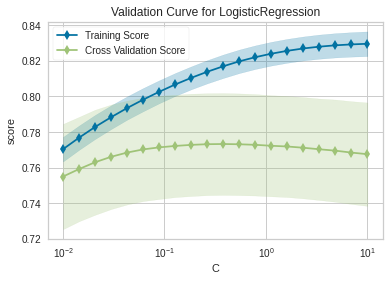

In [339]:
# Validation curve for C parameter 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=123)
param_range = np.logspace(-2, 1, 20)

viz = ValidationCurve(LogisticRegression(random_state=123), param_name="C", param_range=param_range,logx=True, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

In [340]:
# Found above
best_k = dict_model_ftest_features_number[models[0]]['anova__k']

parameters = {'anova__k': [best_k] ,'model__penalty': ['l1', 'l2'], 'model__C' : np.logspace(-2, 1, 30)}
logit = LogisticRegression(random_state=123)


fs = SelectKBest(score_func=f_classif, k= best_k)
pipeline = Pipeline(steps=[('anova',fs), ('model', logit)])

## Find scores and best parameters 
fit_best = fs.fit(X_ebo_train, y_ebo_train)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=123)

clf = GridSearchCV(pipeline, parameters, scoring = 'roc_auc', n_jobs=-1, cv = cv)

clf.fit(X_ebo_train, y_ebo_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=123),
             estimator=Pipeline(steps=[('anova', SelectKBest(k=70)),
                                       ('model',
                                        LogisticRegression(random_state=123))]),
             n_jobs=-1,
             param_grid={'anova__k': [70],
                         'model__C': array([ 0.01      ,  0.01268961,  0.01610262,  0.0204336 ,  0.02592944,
        0.03290345,  0.04175319,  0.05298317,  0.06723358,  0.08531679,
        0.10826367,  0.13738238,  0.17433288,  0.22122163,  0.28072162,
        0.35622479,  0.45203537,  0.57361525,  0.72789538,  0.92367086,
        1.1721023 ,  1.48735211,  1.88739182,  2.39502662,  3.03919538,
        3.85662042,  4.89390092,  6.21016942,  7.88046282, 10.        ]),
                         'model__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [341]:
clf.best_params_

{'anova__k': 70, 'model__C': 0.4520353656360243, 'model__penalty': 'l2'}

LogisticRegression:
On training we get an Accuracy 0.7347383720930233, an AUC 0.6786713551119178 and F1 score 0.8095983307250914 
For test we get an Accuracy 0.7014492753623188, an AUC 0.6496197861767806 and F1 score 0.7822410147991544


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


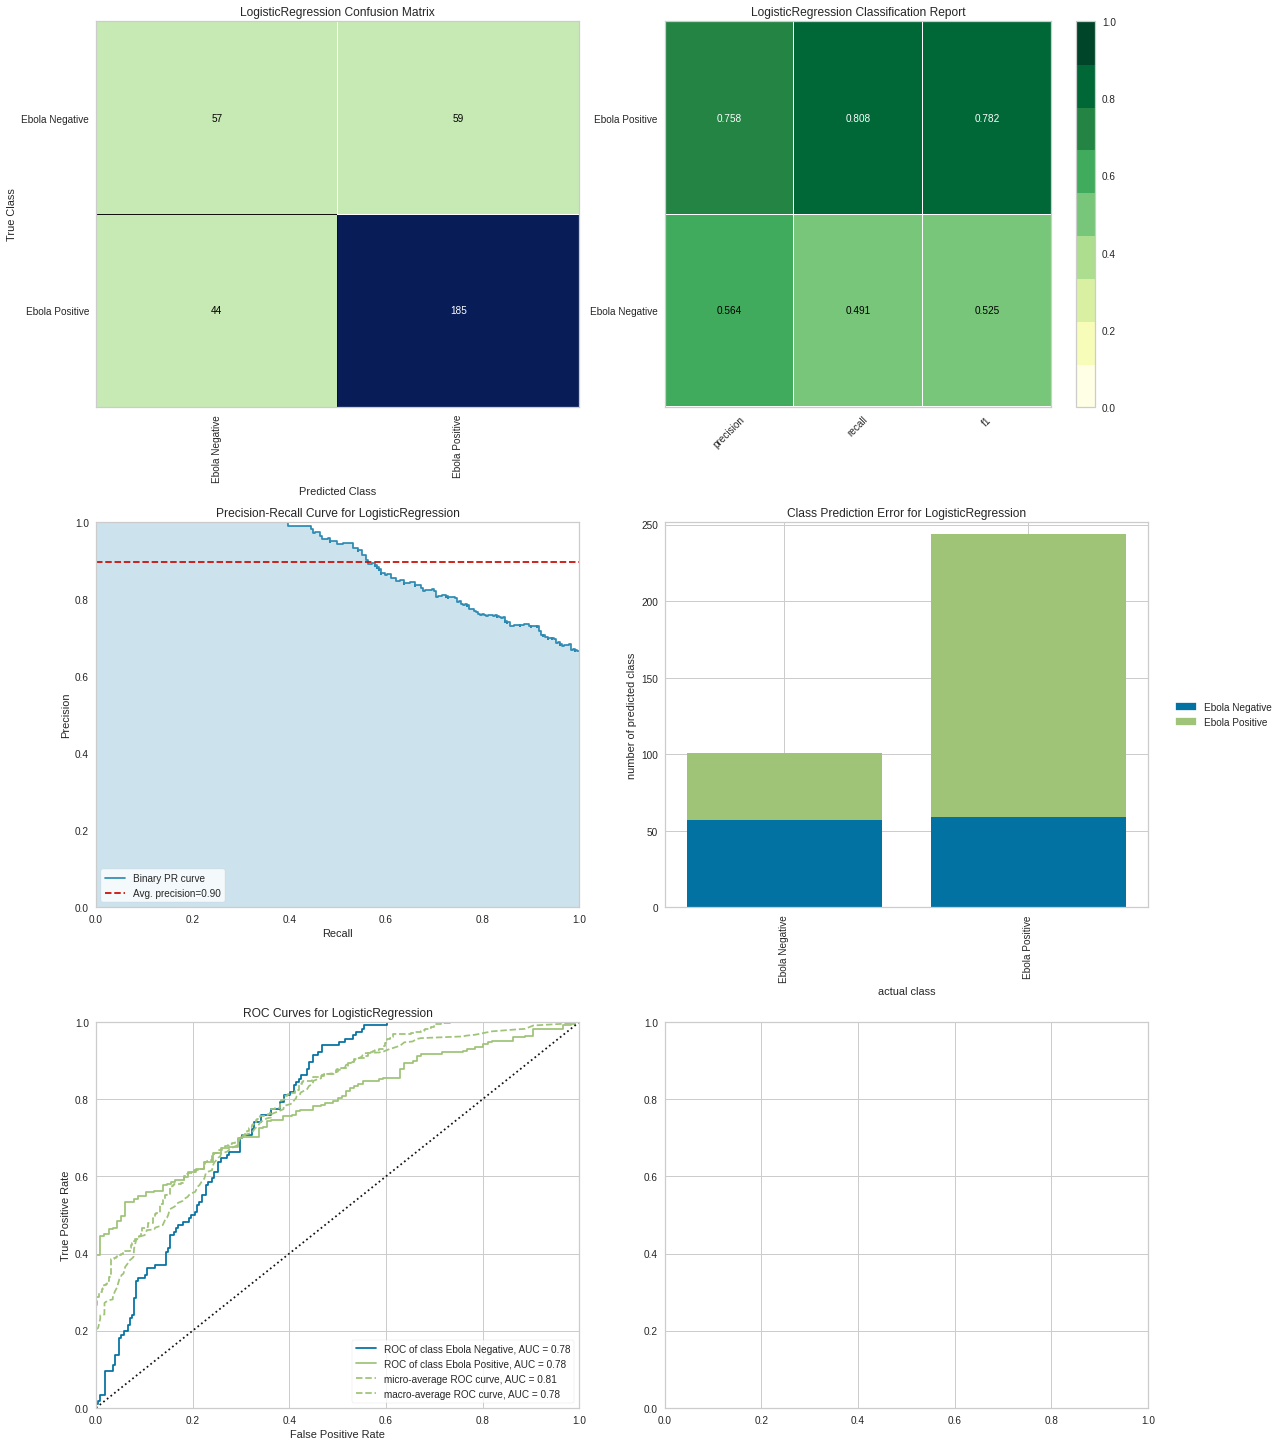

Don't have feature importance




In [342]:
logit = LogisticRegression(
    random_state = 123,
    penalty = clf.best_params_['model__penalty'], 
    C = clf.best_params_['model__C']
)

X_train_sel_ftest = fs.fit_transform(X_ebo_train, y_ebo_train)
X_test_sel_ftest = fs.transform(X_ebo_test)

score_model(X_train_sel_ftest, y_ebo_train, X_test_sel_ftest, y_ebo_test, logit)

##### The most important features are the following

In [343]:
X_ebo_train.columns[fs.get_support()]

Index(['age', 'datmac_dayofyear', 'datgck_dayofyear', 'symfev', 'symvom',
       'symdiar', 'symfat', 'symanor', 'symdouth', 'symdoumu', 'symdouar',
       'symceph', 'symtoux', 'symresp', 'symaval', 'symmalg', 'symconj',
       'symercut', 'symhoq', 'symorb', 'symcoma', 'symconf', 'symasth',
       'symhemor', 'respref_Dinguiraye', 'respref_Guéckédou',
       'respref_LIBERIA', 'respref_Macenta', 'respref_Unknown',
       'respref_Yomou', 'admisnow_No', 'admisnow_Unknown', 'admisnow_Yes',
       'job_Autre', 'job_Chasseur/vendeur de viande de br',
       'job_Chauffeur/transport', 'job_Chef religieux', 'job_Commercant',
       'job_Enfant', 'job_Personnel de santé', 'job_Unknown', 'malpref_Dabola',
       'malpref_Faranah', 'malpref_Forécariah', 'malpref_Guéckédou',
       'malpref_Kouroussa', 'malpref_Lola', 'malpref_Macenta',
       'malpref_Nzérékoré', 'malpref_Unknown', 'referral_time_int',
       'contlien_Aunt and uncle', 'contlien_Kid', 'contlien_Other',
       'contlien_Parent

In [344]:
#### Scores of most important features
dfscores = pd.DataFrame(fit_best.scores_)

dfcolumns = pd.DataFrame(X_ebo_train.columns)

#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

feat_score_logit = featureScores.nlargest(best_k,'Score')
print(featureScores.nlargest(best_k,'Score'))  #print 10 best features
#eli5.show_weights(logit, feature_names=list(X_ebo_train.columns[fs.get_support()]))

              Features       Score
1     datmac_dayofyear  151.530575
68   referral_time_int   90.075590
38    admisnow_Unknown   67.648274
8               symfat   57.650100
39        admisnow_Yes   56.667632
..                 ...         ...
36       respref_Yomou    0.727852
35     respref_Unknown    0.713882
55      malpref_Dabola    0.508590
57  malpref_Forécariah    0.508590
54       malpref_Beyla    0.498297

[70 rows x 2 columns]


### Random Forest

Please note that even with repeated stratified K folds we get quite a high variance, we also tried using the important features that were given using a f_classic function to remove all but the highest k scoring features

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


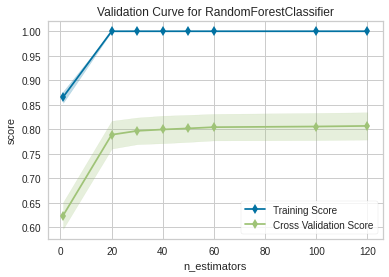

In [345]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=123)
param_range = [1,20,30, 40,50,60,100,120]

viz = ValidationCurve(RandomForestClassifier(random_state=123), param_name="n_estimators", param_range=param_range, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


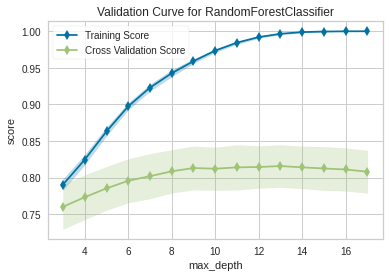

In [346]:
# For max_depth
param_range = np.arange(3,18)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=123)
viz = ValidationCurve(RandomForestClassifier(random_state=123), param_name="max_depth", param_range=param_range, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


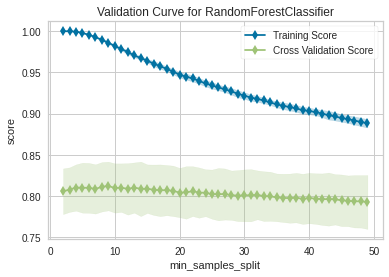

In [347]:
# For min_samples_split

param_range = range(2,50)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=123)
viz = ValidationCurve(RandomForestClassifier(random_state=123), param_name="min_samples_split", param_range=param_range, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


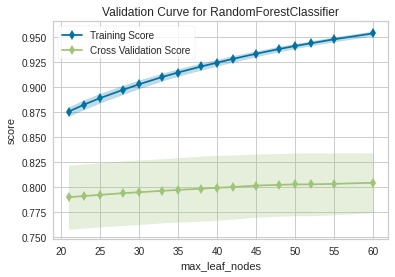

In [348]:
# For max_leaf_nodes
param_range = [21, 23, 25, 28, 30, 33, 35, 38, 40, 42, 45, 48, 50, 52, 55, 60]
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=123)
viz = ValidationCurve(RandomForestClassifier(random_state=123), param_name="max_leaf_nodes", param_range=param_range, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

In [349]:
# Found above
best_k = dict_model_ftest_features_number[models[2]]['anova__k']

clforest = RandomForestClassifier(random_state = 123)
param_test = {
    'anova__k': [best_k] ,
    'model__n_estimators':[30, 40, 50, 60, 100],
    'model__max_depth':[i for i in range(3, 15,3)],
    'model__min_samples_split':[i for i in range(2, 10,3)],
    'model__max_leaf_nodes': [35, 38, 40, 42, 45, 48, 50, 52, 55, 60, 70]
}

fs = SelectKBest(score_func=f_classif, k= best_k)
print(fs)
pipeline = Pipeline(steps=[('anova',fs), ('model', clforest)])

## Find scores and best parameters 
fit_best = fs.fit(X_ebo_train, y_ebo_train)


SelectKBest(k=85)


In [350]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=123)
gsearch = GridSearchCV(estimator= pipeline, param_grid= param_test, scoring='roc_auc', n_jobs=-1, iid=False, cv=cv )
gsearch.fit(X_ebo_train, y_ebo_train)
print(gsearch.best_params_)

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


{'anova__k': 85, 'model__max_depth': 9, 'model__max_leaf_nodes': 70, 'model__min_samples_split': 5, 'model__n_estimators': 100}


RandomForestClassifier:
On training we get an Accuracy 0.8430232558139535, an AUC 0.7915910465819721 and F1 score 0.88911704312115 
For test we get an Accuracy 0.7275362318840579, an AUC 0.6501279927721728 and F1 score 0.812


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


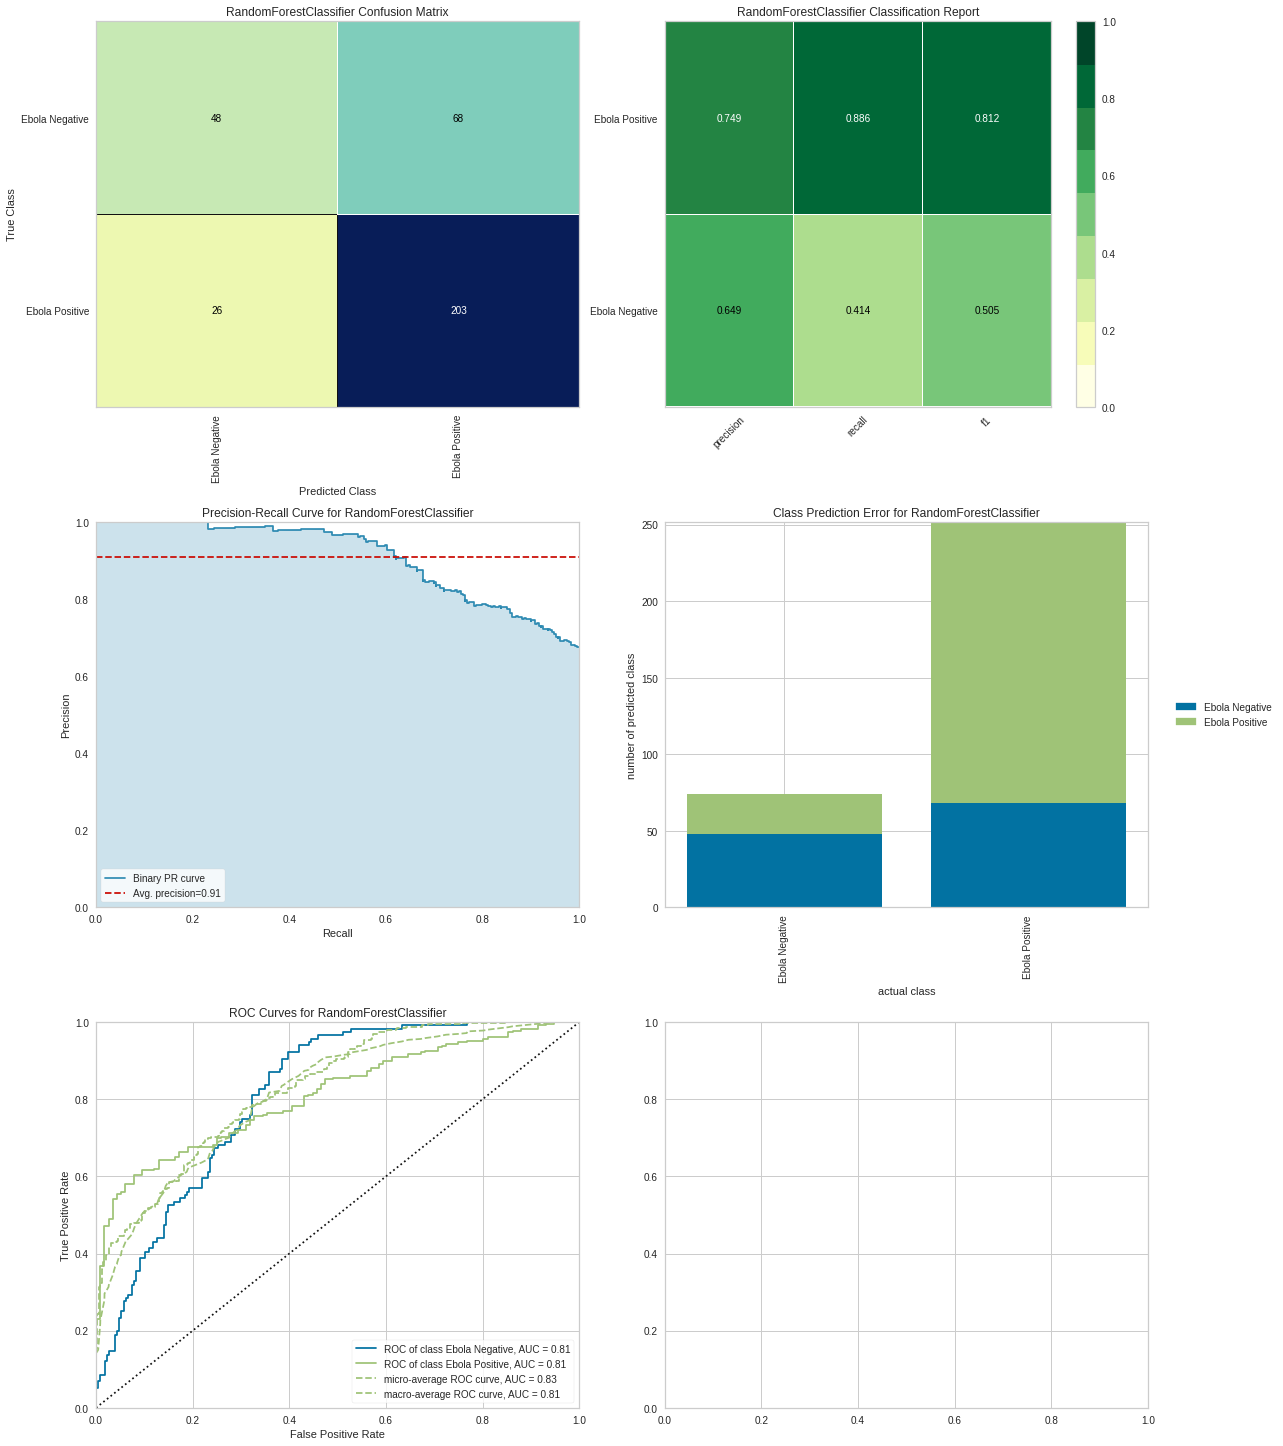

Don't have feature importance




In [351]:
clf_best = RandomForestClassifier(n_estimators=     gsearch.best_params_['model__n_estimators'], 
                                  max_depth=        gsearch.best_params_['model__max_depth'], 
                                  min_samples_split=gsearch.best_params_['model__min_samples_split'],
                                  max_leaf_nodes = gsearch.best_params_['model__max_leaf_nodes'],
                                 random_state = 123)

X_train_sel_ftest = fs.fit_transform(X_ebo_train, y_ebo_train)
X_test_sel_ftest = fs.transform(X_ebo_test)

score_model(X_train_sel_ftest, y_ebo_train, X_test_sel_ftest, y_ebo_test, clf_best)


#### Important features 

In [352]:
X_ebo_train.columns[fs.get_support()]

Index(['age', 'datmac_dayofyear', 'datgck_dayofyear', 'sex_M', 'symfev',
       'symvom', 'symdiar', 'symfat', 'symanor', 'symdouab', 'symdouth',
       'symdoumu', 'symdouar', 'symceph', 'symtoux', 'symresp', 'symaval',
       'symmalg', 'symconj', 'symercut', 'symhoq', 'symorb', 'symcoma',
       'symconf', 'symasth', 'symhemor', 'respref_Conakry',
       'respref_Dinguiraye', 'respref_Guéckédou', 'respref_LIBERIA',
       'respref_Macenta', 'respref_SIERRA LEONE', 'respref_Siguiri',
       'respref_Unknown', 'respref_Yomou', 'admisnow_No', 'admisnow_Unknown',
       'admisnow_Yes', 'job_Autre', 'job_Chasseur/vendeur de viande de br',
       'job_Chauffeur/transport', 'job_Chef (du ménage/communité/etc)',
       'job_Chef religieux', 'job_Commercant', 'job_Enfant', 'job_Etudiant',
       'job_Médecin traditionnel', 'job_Ménagère', 'job_Personnel de santé',
       'job_Unknown', 'malpref_Beyla', 'malpref_Dabola', 'malpref_Faranah',
       'malpref_Forécariah', 'malpref_Guéckédou', 'ma

In [353]:
#### Scores of most important features

dfscores = pd.DataFrame(fit_best.scores_)

dfcolumns = pd.DataFrame(X_ebo_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

feat_score_RF = featureScores.nlargest(best_k,'Score')

print(featureScores.nlargest(best_k,'Score'))  #print 10 best features
#eli5.show_weights(clforest, feature_names=list(X_ebo_ml.columns))

                          Features       Score
1                 datmac_dayofyear  151.530575
68               referral_time_int   90.075590
38                admisnow_Unknown   67.648274
8                           symfat   57.650100
39                    admisnow_Yes   56.667632
..                             ...         ...
34                 respref_Siguiri    0.131786
76  contactnat_2- Physical contact    0.062078
50                    job_Ménagère    0.037230
60             malpref_Kissidougou    0.024533
59                  malpref_Kankan    0.014835

[85 rows x 2 columns]


### Decision tree


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


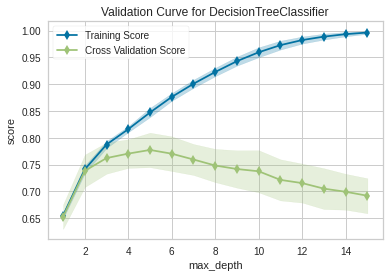

In [354]:
# For max_depth
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=123)

param_range = [1,2,3,4,5,6, 7, 8, 9, 10,11,12,13,14,15]

viz = ValidationCurve(tree.DecisionTreeClassifier(random_state=123), param_name="max_depth", param_range=param_range, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


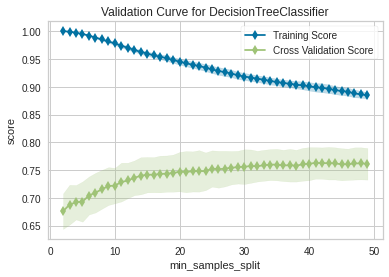

In [355]:
# For min_samples_split

param_range = range(2,50) 

viz = ValidationCurve(tree.DecisionTreeClassifier(random_state=123), param_name="min_samples_split", param_range=param_range, cv=cv, scoring="roc_auc", n_jobs=-1)

viz.fit(X_ebo_train, y_ebo_train)
viz.show()
plt.show()

In [356]:
# Found above
best_k = dict_model_ftest_features_number[models[1]]['anova__k']

cltree = tree.DecisionTreeClassifier(random_state=123)
param_test = {
    'anova__k': [best_k] ,
    'model__max_depth':[i for i in range(3, 15)], 
    'model__min_samples_split':[i for i in range(20, 50)],
}

fs = SelectKBest(score_func=f_classif, k= best_k)
print(fs)
pipeline = Pipeline(steps=[('anova',fs), ('model', cltree)])

## Find scores and best parameters 
fit_best = fs.fit(X_ebo_train, y_ebo_train)

SelectKBest(k=8)


In [357]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=123)
gsearch = GridSearchCV(estimator= pipeline, param_grid= param_test, scoring='roc_auc', n_jobs=-1, iid=False, cv=cv )
gsearch.fit(X_ebo_train, y_ebo_train)
print(gsearch.best_params_)

{'anova__k': 8, 'model__max_depth': 6, 'model__min_samples_split': 20}


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


RandomForestClassifier:
On training we get an Accuracy 0.721656976744186, an AUC 0.6635095281306715 and F1 score 0.8004168837936425 
For test we get an Accuracy 0.6956521739130435, an AUC 0.6452529739497064 and F1 score 0.7770700636942675


/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/lavinia/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


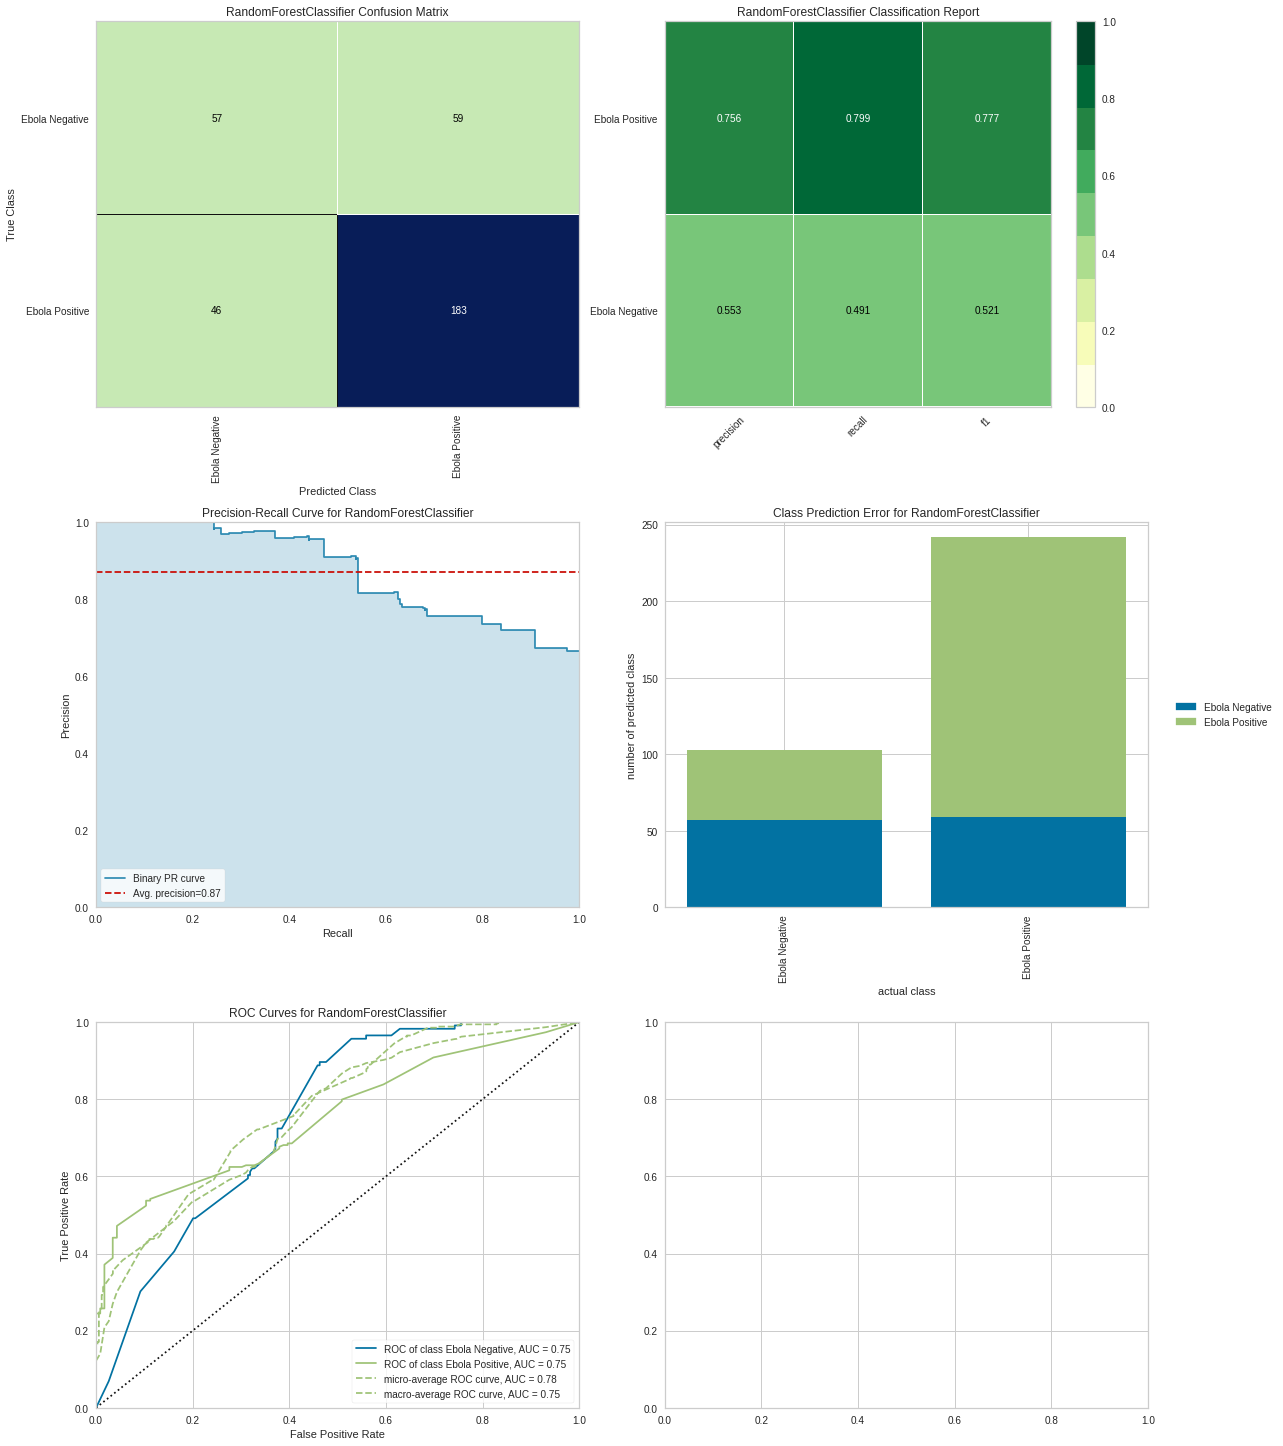

Don't have feature importance




In [358]:
clf_best = RandomForestClassifier(max_depth=        gsearch.best_params_['model__max_depth'], 
                                  min_samples_split=gsearch.best_params_['model__min_samples_split'],
                                 random_state = 123)

X_train_sel_ftest = fs.fit_transform(X_ebo_train, y_ebo_train)
X_test_sel_ftest = fs.transform(X_ebo_test)

score_model(X_train_sel_ftest, y_ebo_train, X_test_sel_ftest, y_ebo_test, clf_best)

#### Important features

In [359]:
X_ebo_train.columns[fs.get_support()]

Index(['datmac_dayofyear', 'symdiar', 'symfat', 'symasth', 'respref_Guéckédou',
       'admisnow_Unknown', 'admisnow_Yes', 'referral_time_int'],
      dtype='object')

In [360]:
#### Scores of most important features
dfscores = pd.DataFrame(fit_best.scores_)

dfcolumns = pd.DataFrame(X_ebo_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

feat_score_DT = featureScores.nlargest(best_k,'Score')
feat_score_DT

,Features,Score
1,datmac_dayofyear,151.530575
68,referral_time_int,90.075590
38,admisnow_Unknown,67.648274
8,symfat,57.650100
39,admisnow_Yes,56.667632
7,symdiar,54.362492
30,respref_Guéckédou,52.652276
26,symasth,52.565149


In [361]:
############################################################################################################################################

In [362]:
cumulator.off() 
cumulator.computation_costs()

967.7972013065219

# Predictions outcome
In order to shorten the NoteBook, the prognosis for this data set is done in : "study_EGOYQN_linelist_prognosis"